# Automotive Analytic

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("whitegrid")
%matplotlib inline

## Reading the data

In [2]:
df = pd.read_excel('Automobile_data.xlsx')
df.head()

Sl. No.  Make      Model  Variant  Displacement  Cylinders  \
0        1  Tata  Nano Genx       Xt         624.0        2.0   
1        2  Tata  Nano Genx       Xe         624.0        2.0   
2        3  Tata  Nano Genx  Emax Xm         624.0        2.0   
3        4  Tata  Nano Genx      Xta         624.0        2.0   
4        5  Tata  Nano Genx       Xm         624.0        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RWD (Rear Wheel Drive)                In-line   
1                  2.0  RWD (Rear Wheel Drive)                In-line   
2                  2.0  RWD (Rear Wheel Drive)                In-line   
3                  2.0  RWD (Rear Wheel Drive)                In-line   
4                  2.0  RWD (Rear Wheel Drive)                In-line   

    Engine_Location  ... Leather_Wrapped_Steering  Automatic_Headlamps  \
0  Rear, Transverse  ...                      NaN                  NaN   
1  Rear, Transverse  ...                      NaN                  NaN   
2  Rear, Transverse  ...                      NaN                  NaN   
3  Rear, Transverse  ...                      NaN                  NaN   
4  Rear, Transverse  ...                      NaN                  NaN   

  Engine_Type  ASR_/_Traction_Control  Cruise_Control  USB_Ports  \
0         NaN                     NaN             NaN        NaN   
1         NaN                     NaN             NaN        NaN   
2         NaN                     NaN             NaN        NaN   
3         NaN                     NaN             NaN        NaN   
4         NaN                     NaN             NaN        NaN   

  Heads-Up_Display  Welcome_Lights  Battery  Electric_Range  
0              NaN             NaN      NaN             NaN  
1              NaN             NaN      NaN             NaN  
2              NaN             NaN      NaN             NaN  
3              NaN             NaN      NaN             NaN  
4              NaN             NaN      NaN             NaN  

[5 rows x 139 columns]

#### Get the list of columns

In [3]:
def check_columns(data):
    return list(data.columns)

In [4]:
cols = check_columns(df)
cols

['Sl. No.',
 'Make',
 'Model',
 'Variant',
 'Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Drivetrain',
 'Cylinder_Configuration',
 'Engine_Location',
 'Fuel_System',
 'Fuel_Tank_Capacity_litre',
 'Fuel_Type',
 'Height_mm',
 'Length_mm',
 'Width_mm',
 'Body_Type',
 'Doors',
 'City_Mileage_km_litre',
 'Highway_Mileage_km_litre',
 'ARAI_Certified_Mileage',
 'ARAI_Certified_Mileage_for_CNG',
 'Kerb_Weight',
 'Gears',
 'Ground_Clearance',
 'Front_Brakes',
 'Rear_Brakes',
 'Front_Suspension',
 'Rear_Suspension',
 'Front_Track',
 'Rear_Track',
 'Front_Tyre_&_Rim',
 'Rear_Tyre_&_Rim',
 'Power_Steering',
 'Power_Windows',
 'Power_Seats',
 'Keyless_Entry',
 'Power',
 'Torque',
 'Odometer',
 'Speedometer',
 'Tachometer',
 'Tripmeter',
 'Seating_Capacity',
 'Seats_Material',
 'Type',
 'Wheelbase',
 'Wheels_Size',
 'Start_/_Stop_Button',
 '12v_Power_Outlet',
 'Audiosystem',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Basic_Warranty',
 'Bluetooth',
 'Boot-lid_Opener',
 'Boot_Sp

In [5]:
print("Numerical Columns:")
print()
print("------------------")
print()

for col in cols:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        print(col, " ",df[col].isnull().sum())

Numerical Columns:

------------------

Sl. No.   0
Displacement   9
Cylinders   40
Valves_Per_Cylinder   61
Fuel_Tank_Capacity_litre   19
Height_mm   0
Length_mm   0
Width_mm   0
Doors   2
City_Mileage_km_litre   329
Highway_Mileage_km_litre   488
Seating_Capacity   3
Boot_Space_litre   131
Minimum_Turning_Radius   199
Number_of_Airbags   83
USB_Ports   779


#### Shape of data

In [6]:
df.shape

(787, 139)

# Data Cleaning

#### List of columns that has 70% of null values

In [7]:
drop_columns = []

print("List of Columns to be dropped as they have 70% of null values")
print()
for col in cols:
    if df[col].isnull().sum() > (0.70*df.shape[0]):
        print(col, "   ",df[col].isnull().sum() )
        drop_columns.append(col)
print()
print("Number of columns: ",len(drop_columns))

List of Columns to be dropped as they have 70% of null values

ARAI_Certified_Mileage_for_CNG     769
Power_Seats     700
Hill_Assist     607
3_Point_Seat-Belt_in_Middle_Rear_Seat     758
Ambient_Lightning     768
Cargo/Boot_Lights     716
Drive_Modes     670
High_Speed_Alert_System     656
Lane_Watch_Camera/_Side_Mirror_Camera     767
Passenger_Side_Seat-Belt_Reminder     680
Voice_Recognition     722
Walk_Away_Auto_Car_Lock     739
Compression_Ratio     581
Other_Specs     780
Other_specs     757
Android_Auto     691
Apple_CarPlay     691
Tyre_Pressure_Monitoring_System     696
ESP_(Electronic_Stability_Program)     595
Recommended_Tyre_Pressure     785
Heated_Seats     740
Rain_Sensing_Wipers     598
Paddle_Shifters     718
Automatic_Headlamps     566
Engine_Type     768
ASR_/_Traction_Control     641
Cruise_Control     553
USB_Ports     779
Heads-Up_Display     768
Welcome_Lights     762
Battery     776
Electric_Range     774

Number of columns:  32


#### Drop the columns

In [8]:
df.drop(columns = drop_columns, inplace = True)
df.shape

(787, 107)

In [9]:
def trim(text):
    string = str(text)[:3]
    return string

In [10]:
from string import punctuation
def rename_column__by_replacing_white_space(df):
    rename_column_map = {}

    for column in df.columns:
        rename_column = column.lower().replace("-", " ").replace(punctuation, "").replace(" ", "_")
        rename_column_map[column] = rename_column
    
    return rename_column_map

In [11]:
df.rename(columns = rename_column__by_replacing_white_space(df), inplace = True)
df.columns

Index(['sl._no.', 'make', 'model', 'variant', 'displacement', 'cylinders',
       'valves_per_cylinder', 'drivetrain', 'cylinder_configuration',
       'engine_location',
       ...
       'eba_(electronic_brake_assist)', 'seat_height_adjustment',
       'navigation_system', 'second_row_ac_vents', 'rear_center_armrest',
       'ipod_compatibility', 'cooled_glove_box', 'turbocharger',
       'isofix_(child_seat_mount)', 'leather_wrapped_steering'],
      dtype='object', length=107)

In [12]:
map = {
    "sl._no.":"serial_no"
}
df.rename(columns=map, inplace=True)
df.columns

Index(['serial_no', 'make', 'model', 'variant', 'displacement', 'cylinders',
       'valves_per_cylinder', 'drivetrain', 'cylinder_configuration',
       'engine_location',
       ...
       'eba_(electronic_brake_assist)', 'seat_height_adjustment',
       'navigation_system', 'second_row_ac_vents', 'rear_center_armrest',
       'ipod_compatibility', 'cooled_glove_box', 'turbocharger',
       'isofix_(child_seat_mount)', 'leather_wrapped_steering'],
      dtype='object', length=107)

#### Shorten the value of drivetrain type name

In [13]:
df['drivetrain'].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)', '4WD',
       'AWD (All Wheel Drive)', nan], dtype=object)

In [14]:
drivetrain_map = {
    'RWD (Rear Wheel Drive)': "RWD", 
    'FWD (Front Wheel Drive)': "FWD", 
    '4WD': '4WD',
    'AWD (All Wheel Drive)':"AWD"
}

df['drivetrain'] = df['drivetrain'].map(drivetrain_map)
df['drivetrain']

0      RWD
1      RWD
2      RWD
3      RWD
4      RWD
      ... 
782    FWD
783    FWD
784    FWD
785    FWD
786    FWD
Name: drivetrain, Length: 787, dtype: object

In [15]:
import re

def get_number(text):
    dec_with_dot = re.compile("\d+\.\d+")
    dec_with_comma = re.compile("\d+\,\d+")
    int = re.compile("\d+")
    try:
        if dec_with_dot.match(text):
            result = dec_with_dot.match(text).group()
        elif dec_with_comma.match(text):
            result = dec_with_comma.match(text).group()

        elif int.match(text):
            result = int.match(text).group()
    except Exception as e:
        result = None
        
    return result 

In [16]:
df.rename(columns = {
    'arai_certified_mileage': 'arai_certified_mileage_km_litre'
}, inplace=True)
df['arai_certified_mileage_km_litre'] = df['arai_certified_mileage_km_litre'].apply(get_number)
df['arai_certified_mileage_km_litre'] = pd.to_numeric(df['arai_certified_mileage_km_litre'], errors='coerce')
df['arai_certified_mileage_km_litre']

0      23.6
1      23.6
2       NaN
3      21.9
4      23.6
       ... 
782    15.1
783    19.5
784    21.0
785    21.0
786    21.0
Name: arai_certified_mileage_km_litre, Length: 787, dtype: float64

In [17]:
df.rename(
    columns = {"kerb_weight": "kerb_weight_kg"},
    inplace = True
)
df["kerb_weight_kg"] = df["kerb_weight_kg"].apply(get_number)
df["kerb_weight_kg"] = df["kerb_weight_kg"].astype(float)
df["kerb_weight_kg"]

0       660.0
1       725.0
2       710.0
3       725.0
4       725.0
        ...  
782    1376.0
783    1395.0
784    1140.0
785    1140.0
786    1140.0
Name: kerb_weight_kg, Length: 787, dtype: float64

In [18]:
df.rename(columns = {"ground_clearance": "ground_clearance_mm"}, inplace=True)
df["ground_clearance_mm"] = df["ground_clearance_mm"].apply(get_number)
df["ground_clearance_mm"] = pd.to_numeric(df['ground_clearance_mm'], errors='coerce')
df["ground_clearance_mm"]

0      180.0
1      180.0
2      180.0
3      180.0
4      180.0
       ...  
782    155.0
783    155.0
784    172.0
785    172.0
786    172.0
Name: ground_clearance_mm, Length: 787, dtype: float64

In [19]:
df['gears'].unique()

array([4, 5, 6, nan, 7, 8, 'Single Speed Reduction Gear'], dtype=object)

In [20]:
df['gears'] = pd.to_numeric(df['gears'], errors='coerce')
df['gears']

0      4.0
1      4.0
2      4.0
3      5.0
4      4.0
      ... 
782    7.0
783    6.0
784    5.0
785    5.0
786    5.0
Name: gears, Length: 787, dtype: float64

In [21]:
df['front_track'].unique()

array(['1325 mm', nan, '1280 mm', '1295 mm', '1420 mm', '1,476 (R13) mm',
       '1476 mm', '1463 mm', '1400 mm', '1460 mm', '1547 mm', '1468 mm',
       '1479 mm', '1485 mm', '1505 mm', '1475 mm', '1578 mm', '1616 mm',
       '1600 mm', '1579 mm', '1618 mm', '1611 mm', '1490 mm', '1530 mm',
       '1520 mm', '1450 mm', '1300 mm', '1560 mm', '1457 mm', '1445 mm',
       '1540 mm', '1515 mm', '1821 mm', '1501 mm', '1609 mm', '1640 mm',
       '1205 mm', '1500 mm', '1580 mm', '1586 mm', '1525 mm', '1626 mm',
       '1080 mm'], dtype=object)

In [22]:
df.rename(columns = {"front_track":"front_track_mm"}, inplace = True)
df['front_track_mm'] = df['front_track_mm'].apply(get_number)
df['front_track_mm'] = pd.to_numeric(df['front_track_mm'], errors="coerce")
df['front_track_mm']

0      1325.0
1      1325.0
2      1325.0
3      1325.0
4      1325.0
        ...  
782       NaN
783       NaN
784    1080.0
785    1080.0
786    1080.0
Name: front_track_mm, Length: 787, dtype: float64

In [23]:
df.rename(columns = {"rear_track":"rear_track_mm"}, inplace = True)
df['rear_track_mm'] = df['rear_track_mm'].apply(get_number)
df['rear_track_mm'] = pd.to_numeric(df['rear_track_mm'], errors="coerce")
df['rear_track_mm']

0      1315.0
1      1315.0
2      1315.0
3      1315.0
4      1315.0
        ...  
782       NaN
783       NaN
784    1600.0
785    1600.0
786    1600.0
Name: rear_track_mm, Length: 787, dtype: float64

In [24]:
map = {
    "wheelbase":"wheelbase_mm"
}
df.rename(columns = map, inplace = True)

df['wheelbase_mm'] = df['wheelbase_mm'].apply(get_number)
df['wheelbase_mm'] = pd.to_numeric(df['wheelbase_mm'], errors='coerce')
df['wheelbase_mm']

0      2230.0
1      2230.0
2      2230.0
3      2230.0
4      2230.0
        ...  
782    2688.0
783    2688.0
784    2630.0
785    2630.0
786    2630.0
Name: wheelbase_mm, Length: 787, dtype: float64

In [25]:
map = {
    "power":"power_nm"
}
df.rename(columns = map, inplace = True)

df['power_nm'] = df['power_nm'].apply(get_number)
df['power_nm'] = pd.to_numeric(df['power_nm'], errors='coerce')
df['power_nm']

0       38.0
1       38.0
2       38.0
3       38.0
4       38.0
       ...  
782    180.0
783    143.0
784     65.0
785     65.0
786    120.0
Name: power_nm, Length: 787, dtype: float64

In [26]:
def get_torque(text):
    splitted = str(text).replace("hp", " ").replace("nm", " ").replace("Nm", " ").replace("NM", " ").replace("nM", " ").replace("@", " ").replace("kgm", " ").replace("KGM", " ").split(" ")
    return splitted[0]

In [27]:
map = {
    'torque':'torque_nm'
}
df.rename(columns = map, inplace = True)

df['torque_nm'] =  df['torque_nm'].apply(get_number)
df['torque_nm'] = df['torque_nm'].astype(float)
df['torque_nm']

0       51.0
1       51.0
2       51.0
3       51.0
4       51.0
       ...  
782    250.0
783    320.0
784    160.0
785    160.0
786    280.0
Name: torque_nm, Length: 787, dtype: float64

# Correlation Heatmap Function

In [28]:
def correlation_heatmap(data, figsize = (40,40),font_scale = 3, fontsize = 20):
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale)
    sns.heatmap(data.corr(), annot = True, annot_kws={"fontsize":fontsize})

# Univariate Analysis Function

In [29]:
import string

# link: https://stackoverflow.com/questions/42404154/increase-tick-label-font-size-in-seaborn

def identify_outliers_using_histogram_and_boxplot(df, column):
    sns.set(font_scale = 0.8)
    displacement_boxplot = sns.boxplot(data = df, y = column)
    displacement_boxplot.set_ylabel(f"{column.capitalize()}", fontdict = {'fontsize' : 10})
    displacement_boxplot.set_title(f"{column.capitalize()} Distribution", fontdict = {'fontsize' : 10})
    
    plt.figure(figsize = (10,10))
    plt.hist(x = column, data = df)
    plt.ylabel("Frequency")
    plt.title(f"{column.replace('_', ' ').capitalize()} Distribution")
    plt.show();

def get_outliers(dataset, column):
    # 25th Percentile
    p25 = dataset[column].quantile(0.25)
    # 75th Percentile
    p75 = dataset[column].quantile(0.75)
    
    iqr = p75-p25
    
    # # Calculating the outliers
    
    dataset_no_outliers = dataset[(dataset[column]>(p25-(1.5*iqr))) & (dataset[column]<(p75+(1.5*iqr)))]
    outliers_num = dataset.shape[0]-dataset_no_outliers.shape[0]
    dataset_no_outliers_index = list(dataset_no_outliers.index)
    dataset_index = list(dataset.index)
    outlier_indexes = []
    for x in dataset_index:
        if x not in dataset_no_outliers_index:
            outlier_indexes.append(x)
    
    
    
    
    
    identify_outliers_using_histogram_and_boxplot(dataset, column)
    
    print("Whisker:")
    print()
    print("Lower whisker", (p25-(1.5*iqr)))
    print("Upper Whisker", (p75+(1.5*iqr)))
    
    print("\nLength of outlier index len(): ", len(outlier_indexes))
    print("dataset.shape[0]: ", dataset.shape[0])
    print("dataset_no_outliers.shape[0]: ", dataset_no_outliers.shape[0])
    print("No of outlier (dataset.shape[0]-dataset_no_outliers.shape[0]) : ", outliers_num)
   
    return p25, p75, iqr, outlier_indexes, outliers_num;

def univariate_analysis(data, column):
    '''
    data: dataframe
    column: column to be analysed
    This function is to do univariate analysis on numerical columns
    '''
    
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()
    min = data[column].min()
    max = data[column].max()
    sd = data[column].std()
    
    p25, p75, iqr, outliers_index, outliers_num = get_outliers(data, column)

    dup = data.duplicated()
    if len(data[dup])> 0:
        data.drop_duplicates(inplace = True)
        print("Duplicates dropped successfully")
    
    
    print()
    print("Stats Info:")
    print("-------------------------------------------")
    print(f"Mean of {column}: ", mean)
    print(f"Median of {column}: ", median)
    print(f"Mode of {column}: ", mode)
    print(f"Min of {column}: ", min)
    print(f"Max of {column}: ", max)
    print(f"Standard Deviation of {column}: ", sd)
    print(f"25th percentile of {column}: ", p25)
    print(f"75th percentile of {column}: ", p75)
    print()
    print("Outlier Info:")
    print("-------------------------------------------")
    print("Number of outliers: ", outliers_num)
    print()
    print("Null values: ", df[column].isnull().sum())
    
    return p25, p75, iqr, outliers_index, outliers_num;


# Grouping Plot Function

In [30]:
# NOTE (changing the fontsize):
# changing the fontsize of yticks or xticks fontsize
# Link : https://www.geeksforgeeks.org/how-to-set-tick-labels-font-size-in-matplotlib/
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

# NOTE (Bar Label):
# bar label https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

# fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
# fruit_counts = [4000, 2000, 7000]

# fig, ax = plt.subplots()
# bar_container = ax.bar(fruit_names, fruit_counts)
# ax.set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 8000))
# ax.bar_label(bar_container, fmt='{:,.0f}')

def null_proof(data, column1, column2):
    new_data = data[(data[column1].notnull()) & (data[column2].notnull())]
    return new_data

def group_agg_bar_plot(data, 
                       category, 
                       number, 
                       agg, 
                       xlabel = "", 
                       ylabel = "", 
                       title = "", 
                       xticksfontsize = 25, 
                       yticksfontsize = 25,
                       titlefontsize = 30):
    
    data = null_proof(data, category, number)
    
    group_dict = dict(data.groupby(category)[number].agg(agg))
    cat_list = []
    num_list = []
    if len(group_dict)>10:
        sorted_group_dict = sorted(group_dict.items(), key = lambda tup:tup[1], reverse = True)
        for tup in sorted_group_dict[:10]:
            cat_list.append(tup[0])
            num_list.append(tup[1])
    elif len(group_dict)<=10:
        for k, v in group_dict.items():
            cat_list.append(k)
            num_list.append(v)
    
    plt.figure(figsize = (15,15))

    bar = plt.bar(x = cat_list, height= num_list)
    plt.bar_label(bar, label_type='edge', fontsize=22)
    plt.xticks(fontsize = xticksfontsize)
    plt.yticks(fontsize = yticksfontsize)
    plt.xlabel(f"{xlabel}", fontsize = 25)
    plt.ylabel(f"{ylabel}", fontsize = 25)
    plt.title(f"{title}", fontsize = titlefontsize)
    plt.show();
    
def group_agg_horizontal_bar_plot(data, 
                                  category, 
                                  number, 
                                  agg, 
                                  xlabel = "",
                                  xlabelfontsize = 15,
                                  ylabel = "", 
                                  title = "",
                                  xticksfontsize = 25, 
                                  yticksfontsize = 25,
                                  titlefontsize = 30):
    
    data = null_proof(data, category, number)
    
    group_dict = dict(data.groupby(category)[number].agg(agg))
    cat_list = []
    num_list = []
    if len(group_dict)>10:
        sorted_group_dict = sorted(group_dict.items(), key = lambda tup:tup[1], reverse = True)
        for tup in sorted_group_dict[:10]:
            cat_list.append(tup[0])
            num_list.append(tup[1])
    elif len(group_dict)<=10:
        for k, v in group_dict.items():
            cat_list.append(k)
            num_list.append(v)
    
    plt.figure(figsize = (15,15))

    bar = plt.barh(y = cat_list, width= num_list)
    plt.bar_label(bar, label_type='edge', fontsize=22)
    plt.yticks(fontsize = yticksfontsize)
    plt.xticks(fontsize = xticksfontsize)
    plt.xlabel(f"{xlabel}", fontsize = xlabelfontsize)
    plt.title(f"{title}", fontsize = titlefontsize)
    plt.show();
    
    
def group_agg_pie(data, 
                   category, 
                   number):
    
    data = null_proof(data, category, number)
    
    group_dict = dict(data.groupby(category)[number].agg('count'))
    cat_list = []
    num_list = []
    if len(group_dict)>10:
        sorted_group_dict = sorted(group_dict.items(), key = lambda tup:tup[1], reverse = True)
        for tup in sorted_group_dict[:10]:
            cat_list.append(tup[0])
            num_list.append(tup[1])
    elif len(group_dict)<=10:
        for k, v in group_dict.items():
            cat_list.append(k)
            num_list.append(v)
    
    plt.figure(figsize = (5,5))

    plt.pie(x = num_list, labels = cat_list, autopct = '%1.1f%%')

# Bivariate Analysis Function

In [31]:
from math import sqrt

def null_proof_corr(data, column1, column2):
    new_data = data[(data[column1].notnull()) & (data[column2].notnull())]
    
    x = list(new_data[column1])
    y = list(new_data[column2])
    return x, y

def mean_normalise(var):   

    
    lst = []
    
    mean_of_var = np.mean(var)
    
    for el in var:
        lst.append(el - mean_of_var)
        
    return lst
def covariance(x,y):
    # mean normalise both list
    x_norm = np.array(mean_normalise(x))
    y_norm = np.array(mean_normalise(y))
    
    # calculate the numerator
    numerator = np.sum(x_norm * y_norm)
    
    # Divide the numerator by n - 1 and return
    covariance = numerator/(len(x)-1)
    print("Covariance: ", covariance)
    return covariance
    
    
def stddev(var):
    mean = sum(var)/len(var)
    
    sum_of_squares = 0
    for i in var:
        sum_of_squares  += (i-mean)**2
        
    n = len(var)
    variance = sum_of_squares / (n-1)
    return sqrt(variance)

def correlation(x,y):
    # find the numerator (covariance)
    numerator = covariance(x,y)
    
    # Find standard deviations of both lists
    s_x = stddev(x)
    s_y = stddev(y)
    
    print(f"Standard Deviation of x: ", s_x)
    print(f"Standard Deviation of y: ", s_y)
    denominator = s_x * s_y
    
    # Return numerator divided by multiplied standard deviations
    return numerator/denominator

def bivariate_analysis(data, x_col, y_col, xlabel = "", ylabel = "", hue  = None, font_scale = 1):
    """
    data: Dataframe to be analysed
    xlabel: x label
    ylabel: y label
    """
    x, y = null_proof_corr(data, x_col, y_col)
    fts_corr = correlation(x,y)
    print("Correlations: ", fts_corr)
    print("----------------------------------------\n")
    plt.figure(figsize = (25,25))
    sns.set(font_scale = font_scale)
    linear_plot = sns.lmplot(data = data, x = x_col, y = y_col, hue = hue)
    linear_plot.set_xlabels(xlabel)
    linear_plot.set_ylabels(ylabel)
    linear_plot.set(title = f"{xlabel} vs. {ylabel}")
    plt.show();

In [32]:
num_cols = []
non_num_cols  = []
for col in list(df.columns):
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        print(col, " ",df[col].isnull().sum())
        num_cols.append(col)
    else:
        non_num_cols.append(col)
        
print("Numerical Columns")
print(num_cols)
print()
print("Non Numerical Cols")
print(non_num_cols)

serial_no   0
displacement   9
cylinders   40
valves_per_cylinder   61
fuel_tank_capacity_litre   19
height_mm   0
length_mm   0
width_mm   0
doors   2
city_mileage_km_litre   329
highway_mileage_km_litre   488
arai_certified_mileage_km_litre   48
kerb_weight_kg   232
gears   50
ground_clearance_mm   142
front_track_mm   429
rear_track_mm   429
power_nm   0
torque_nm   3
seating_capacity   3
wheelbase_mm   12
boot_space_litre   131
minimum_turning_radius   199
number_of_airbags   83
Numerical Columns
['serial_no', 'displacement', 'cylinders', 'valves_per_cylinder', 'fuel_tank_capacity_litre', 'height_mm', 'length_mm', 'width_mm', 'doors', 'city_mileage_km_litre', 'highway_mileage_km_litre', 'arai_certified_mileage_km_litre', 'kerb_weight_kg', 'gears', 'ground_clearance_mm', 'front_track_mm', 'rear_track_mm', 'power_nm', 'torque_nm', 'seating_capacity', 'wheelbase_mm', 'boot_space_litre', 'minimum_turning_radius', 'number_of_airbags']

Non Numerical Cols
['make', 'model', 'variant', 'dr

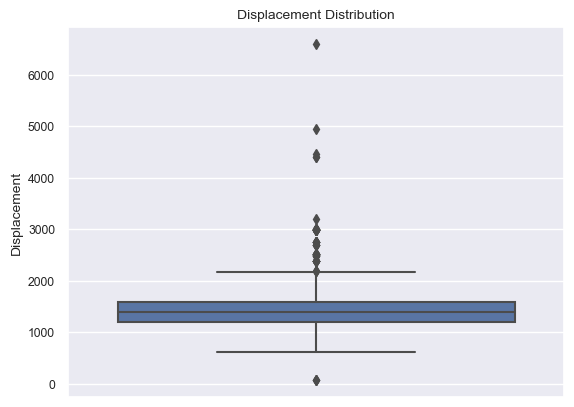

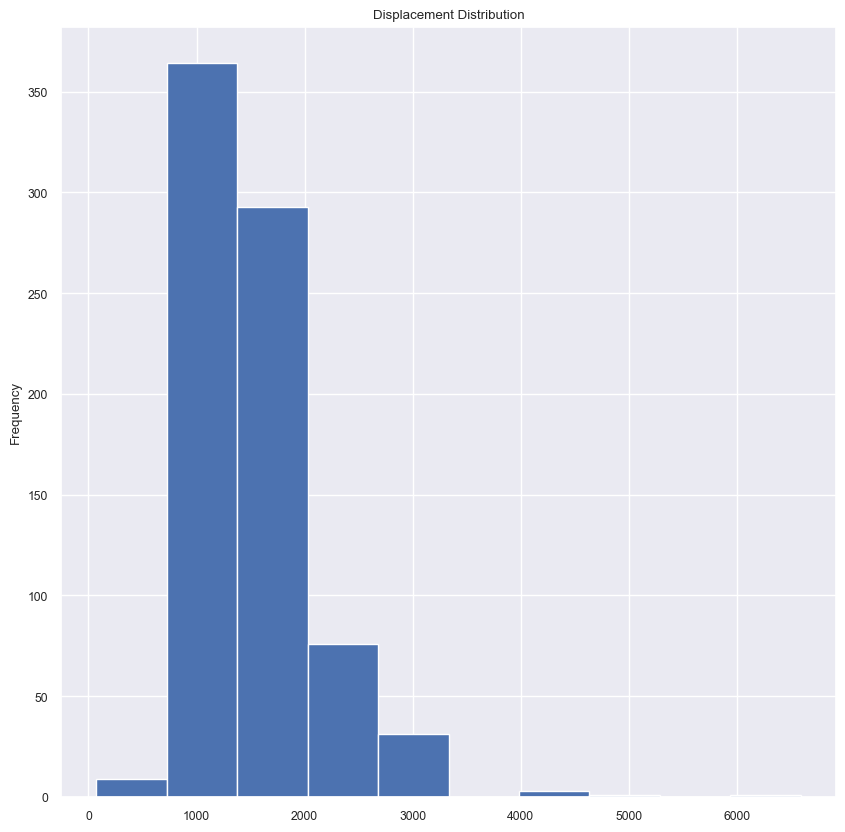

Whisker:

Lower whisker 606.0
Upper Whisker 2182.0

Length of outlier index len():  76
dataset.shape[0]:  787
dataset_no_outliers.shape[0]:  711
No of outlier (dataset.shape[0]-dataset_no_outliers.shape[0]) :  76

Stats Info:
-------------------------------------------
Mean of displacement:  1515.8650385604112
Median of displacement:  1396.5
Mode of displacement:  0    1197.0
Name: displacement, dtype: float64
Min of displacement:  72.0
Max of displacement:  6592.0
Standard Deviation of displacement:  562.3679331066791
25th percentile of displacement:  1197.0
75th percentile of displacement:  1591.0

Outlier Info:
-------------------------------------------
Number of outliers:  76

Null values:  9


In [33]:
p25, p75, iqr,  outlier_index, outliers_num =univariate_analysis(df, 'displacement')

In [34]:
displacement_lower_whisker = df[df['displacement']<(p25-(1.5*iqr))]
displacement_lower_whisker

serial_no      make     model variant  displacement  cylinders  \
497        498  Mahindra  E Verito      D4          72.0        NaN   
498        499  Mahindra  E Verito      D2          72.0        NaN   
499        500  Mahindra  E Verito      D6          72.0        NaN   

     valves_per_cylinder drivetrain cylinder_configuration engine_location  \
497                  NaN        FWD                    NaN             NaN   
498                  NaN        FWD                    NaN             NaN   
499                  NaN        FWD                    NaN             NaN   

     ... eba_(electronic_brake_assist)  seat_height_adjustment  \
497  ...                           NaN                     NaN   
498  ...                           NaN                     NaN   
499  ...                           NaN       Manual Adjustment   

    navigation_system  second_row_ac_vents  rear_center_armrest  \
497               NaN                  NaN                  NaN   
498               NaN                  NaN                  NaN   
499               NaN                  NaN                  NaN   

     ipod_compatibility cooled_glove_box  turbocharger  \
497                 NaN              NaN           NaN   
498                 NaN              NaN           NaN   
499                 NaN              NaN           NaN   

     isofix_(child_seat_mount)  leather_wrapped_steering  
497                        NaN                       NaN  
498                        NaN                       NaN  
499                        NaN                       NaN  

[3 rows x 107 columns]

#### Non Numerical Columns

In [35]:
for i in list(non_num_cols):
    print(i)
    print(df[(df['displacement']<(p25-(1.5*iqr)))][i].unique())
    print()

make
['Mahindra']

model
['E Verito']

variant
['D4' 'D2' 'D6']

drivetrain
['FWD']

cylinder_configuration
[nan]

engine_location
[nan]

fuel_system
[nan]

fuel_type
['Electric']

body_type
['Sedan']

front_brakes
['Ventilated Disc']

rear_brakes
['Drum']

front_suspension
['Macpherson-type with wishbone link']

rear_suspension
['H-Section torsion beam with programmed deflection-coil spring']

front_tyre_&_rim
['185/70R14']

rear_tyre_&_rim
['185/70R14']

power_steering
['Electro-Hydraulic']

power_windows
['All Windows']

keyless_entry
['Remote' nan]

odometer
['Digital']

speedometer
['Yes' 'Analog']

tachometer
['Analog']

tripmeter
['Yes']

seats_material
['Fabric']

type
['Automatic']

wheels_size
['185/70R14']

start_/_stop_button
[nan]

12v_power_outlet
['Yes' 1]

audiosystem
['CD/MP3/DVD Player with USB & Aux-in' 'Not on offer'
 'CD Player with USB & Aux-in']

aux_in_compatibility
['Yes' nan]

average_fuel_consumption
[nan]

basic_warranty
['2 Years / 40,000 Kms (Whichever com

#### Numerical COlumns

In [36]:
for i in list(num_cols):
    print(i)
    print(df[(df['displacement']<(p25-(1.5*iqr)))][i].unique())
    print()

serial_no
[498 499 500]

displacement
[72.]

cylinders
[nan]

valves_per_cylinder
[nan]

fuel_tank_capacity_litre
[nan]

height_mm
[1540]

length_mm
[4247]

width_mm
[1740]

doors
[4.]

city_mileage_km_litre
[11.]

highway_mileage_km_litre
[nan]

arai_certified_mileage_km_litre
[nan]

kerb_weight_kg
[nan]

gears
[nan]

ground_clearance_mm
[nan]

front_track_mm
[nan]

rear_track_mm
[nan]

power_nm
[41.]

torque_nm
[91.]

seating_capacity
[5.]

wheelbase_mm
[2630.]

boot_space_litre
[510.]

minimum_turning_radius
[5.25]

number_of_airbags
[nan]



In [37]:
from pandasql import sqldf

pysqldf = lambda q:sqldf(q)



In [38]:
q = """
SELECT distinct fuel_type
FROM displacement_lower_whisker
"""
pysqldf(q)

fuel_type
0  Electric

In [39]:
displacement_lower_whisker_index_drop = []
for i in displacement_lower_whisker.index:
    if i in df.index:
        print(i)
        displacement_lower_whisker_index_drop.append(i)

497
498
499


In [40]:
df.drop(index = displacement_lower_whisker_index_drop, inplace = True)
df.shape # Print the shape after dropping (787,139)

(784, 107)

### Upper Whisker

In [41]:
displacement_upper_whis = df[(df['displacement']>(p75+(1.5*iqr)))]
displacement_upper_whis

serial_no    make           model              variant  displacement  \
208        209     Bmw              X5      Xdrive30D Sport        2993.0   
209        210     Bmw              X5      Xdrive30D Xline        2993.0   
210        211     Bmw              X5    Xdrive40I M Sport        2998.0   
211        212    Ford         Mustang          Fastback V8        4951.0   
212        213     Bmw  M2 Competition                Coupe        2979.0   
..         ...     ...             ...                  ...           ...   
728        729     Bmw        6-Series      630D Gt M Sport        2993.0   
729        730     Bmw        6-Series  630I Gt Luxury Line        4395.0   
731        732     Bmw              M5          Competition        4395.0   
755        756    Tata          Winger                  15S        2200.0   
757        758  Toyota           Camry               Hybrid        2487.0   

     cylinders  valves_per_cylinder drivetrain cylinder_configuration  \
208        6.0                  4.0        AWD                In-line   
209        6.0                  4.0        AWD                In-line   
210        6.0                  4.0        AWD                In-line   
211        8.0                  4.0        RWD                      V   
212        6.0                  4.0        RWD                In-line   
..         ...                  ...        ...                    ...   
728        6.0                  4.0        AWD                      V   
729        8.0                  4.0        RWD                In-line   
731        8.0                  4.0        AWD                      V   
755        4.0                  NaN        FWD                      V   
757        4.0                  4.0        FWD                In-line   

         engine_location  ... eba_(electronic_brake_assist)  \
208  Front, Longitudinal  ...                           Yes   
209  Front, Longitudinal  ...                           Yes   
210  Front, Longitudinal  ...                           Yes   
211  Front, Longitudinal  ...                           Yes   
212  Front, Longitudinal  ...                           Yes   
..                   ...  ...                           ...   
728  Front, Longitudinal  ...                           Yes   
729  Front, Longitudinal  ...                           NaN   
731  Front, Longitudinal  ...                           Yes   
755  Front, Longitudinal  ...                           NaN   
757    Front, Transverse  ...                           Yes   

              seat_height_adjustment navigation_system  second_row_ac_vents  \
208  Electric Adjustment with Memory               Yes                  Yes   
209  Electric Adjustment with Memory               Yes                  Yes   
210  Electric Adjustment with Memory               Yes                  Yes   
211  Electric Adjustment with Memory               Yes                  NaN   
212  Electric Adjustment with Memory               Yes                  NaN   
..                               ...               ...                  ...   
728  Electric Adjustment with Memory               Yes                  Yes   
729        Semi Automatic Adjustment               Yes                  NaN   
731  Electric Adjustment with Memory               Yes                  Yes   
755                Manual Adjustment               NaN                  NaN   
757  Electric Adjustment with Memory               Yes                  Yes   

     rear_center_armrest  ipod_compatibility cooled_glove_box  turbocharger  \
208          Cup Holders                 Yes              Yes           Yes   
209          Cup Holders                 Yes              Yes           Yes   
210          Cup Holders                 Yes              Yes           Yes   
211                  NaN                 Yes              Yes           NaN   
212                  NaN                 Yes              Yes           NaN   
..                   ..

In [42]:
from pandasql import sqldf

pysqldf = lambda x:sqldf(x)

In [43]:
q = """
SELECT DISTINCT engine_location
FROM displacement_upper_whis
"""

pysqldf(q)

engine_location
0  Front, Longitudinal
1    Front, Transverse

In [44]:
q = """
SELECT DISTINCT engine_location
FROM displacement_upper_whis
"""

pysqldf(q)

engine_location
0  Front, Longitudinal
1    Front, Transverse

In [45]:
q = """
SELECT DISTINCT fuel_type
FROM displacement_upper_whis
"""

pysqldf(q)

fuel_type
0    Diesel
1    Petrol
2    Hybrid

In [46]:
displacement_upper_whis[displacement_upper_whis['fuel_type'] == 'Hybrid']


serial_no    make     model       variant  displacement  cylinders  \
218        219     Bmw  7-Series  745Le Xdrive        2998.0        6.0   
757        758  Toyota     Camry        Hybrid        2487.0        4.0   

     valves_per_cylinder drivetrain cylinder_configuration  \
218                  4.0        AWD                      V   
757                  4.0        FWD                In-line   

         engine_location  ... eba_(electronic_brake_assist)  \
218  Front, Longitudinal  ...                           Yes   
757    Front, Transverse  ...                           Yes   

              seat_height_adjustment navigation_system  second_row_ac_vents  \
218  Electric Adjustment with Memory               Yes                  Yes   
757  Electric Adjustment with Memory               Yes                  Yes   

     rear_center_armrest  ipod_compatibility cooled_glove_box  turbocharger  \
218          Cup Holders                 Yes              Yes           Yes   
757       Audio Controls                 NaN              Yes           NaN   

     isofix_(child_seat_mount)  leather_wrapped_steering  
218                        Yes                       Yes  
757                        Yes                       Yes  

[2 rows x 107 columns]

In [47]:
displacement_upper_whis_hybrid_index = displacement_upper_whis[displacement_upper_whis['fuel_type'] == 'Hybrid'].index
displacement_upper_whis_hybrid_drop_index = []
for i in list(displacement_upper_whis_hybrid_index):
    if i in list(df.index):
        print(i)
        displacement_upper_whis_hybrid_drop_index.append(i)

218
757


In [48]:
q = """
SELECT DISTINCT body_type
FROM displacement_upper_whis
"""

pysqldf(q)

body_type
0                  SUV
1         Sedan, Coupe
2                Coupe
3                Sedan
4                  MUV
5  Sports, Convertible

In [49]:
q = """
SELECT  body_type, AVG(displacement)
FROM displacement_upper_whis
GROUP BY body_type
ORDER BY  AVG(displacement)
"""

pysqldf(q)

body_type  AVG(displacement)
0                  MUV        2477.352941
1                  SUV        2736.258065
2  Sports, Convertible        2998.000000
3                Sedan        3402.545455
4                Coupe        3451.000000
5         Sedan, Coupe        4951.000000

In [50]:
q = """
SELECT DISTINCT body_type
FROM df
"""

pysqldf(q)

body_type
0             Hatchback
1                   MPV
2                   MUV
3                 Sedan
4             Crossover
5                  None
6                   SUV
7          Sedan, Coupe
8                 Coupe
9        Crossover, SUV
10       SUV, Crossover
11  Sports, Convertible

In [51]:
q = """
SELECT  body_type, AVG(displacement)
FROM df
GROUP BY body_type
ORDER BY AVG(displacement)
"""

pysqldf(q)

body_type  AVG(displacement)
0             Hatchback        1161.885057
1             Crossover        1262.700000
2                   MPV        1371.040000
3                 Sedan        1558.239631
4                   SUV        1818.301370
5                   MUV        1943.312500
6        SUV, Crossover        1995.000000
7        Crossover, SUV        1996.500000
8                  None        2157.000000
9   Sports, Convertible        2498.000000
10                Coupe        3451.000000
11         Sedan, Coupe        4951.000000

In [52]:
print("No of rows:",displacement_upper_whis[displacement_upper_whis['body_type'] == 'MUV'].shape[0])
displacement_upper_whis_muv = displacement_upper_whis[displacement_upper_whis['body_type'] == 'MUV']
displacement_upper_whis_muv_index = displacement_upper_whis_muv.index
displacement_upper_whis[displacement_upper_whis['body_type'] == 'MUV']

No of rows: 17


serial_no    make          model                        variant  \
507        508  Toyota  Innova Crysta                   2.4 Gx 7 Str   
508        509  Toyota  Innova Crysta                   2.4 Vx 7 Str   
509        510  Toyota  Innova Crysta                   2.4 Gx 8 Str   
510        511  Toyota  Innova Crysta                   2.4 Vx 8 Str   
511        512  Toyota  Innova Crysta                   2.4 Zx 7 Str   
512        513  Toyota  Innova Crysta                2.7 Gx At 8 Str   
513        514  Toyota  Innova Crysta                2.7 Gx At 7 Str   
514        515  Toyota  Innova Crysta                2.7 Zx At 7 Str   
515        516  Toyota  Innova Crysta                   2.7 Vx 7 Str   
516        517  Toyota  Innova Crysta                2.7 Gx Mt 7 Str   
517        518  Toyota  Innova Crysta                2.7 Gx Mt 8 Str   
518        519  Toyota  Innova Crysta     Touring Sport 2.4 Vx 7 Str   
519        520  Toyota  Innova Crysta     Touring Sport 2.7 Vx 7 Str   
520        521  Toyota  Innova Crysta  Touring Sport 2.7 Zx At 7 Str   
521        522  Toyota  Innova Crysta               2.4 G Plus 7 Str   
522        523  Toyota  Innova Crysta               2.4 G Plus 8 Str   
755        756    Tata         Winger                            15S   

     displacement  cylinders  valves_per_cylinder drivetrain  \
507        2393.0        4.0                  4.0        RWD   
508        2393.0        4.0                  4.0        RWD   
509        2393.0        4.0                  4.0        RWD   
510        2393.0        4.0                  4.0        RWD   
511        2393.0        4.0                  4.0        RWD   
512        2694.0        4.0                  4.0        RWD   
513        2694.0        4.0                  4.0        RWD   
514        2393.0        4.0                  4.0        RWD   
515        2393.0        4.0                  4.0        RWD   
516        2755.0        4.0                  4.0        RWD   
517        2755.0        4.0                  4.0        RWD   
518        2393.0        4.0                  4.0        RWD   
519        2393.0        4.0                  4.0        RWD   
520        2694.0        4.0                  4.0        RWD   
521        2393.0        4.0                  4.0        RWD   
522        2393.0        4.0                  4.0        RWD   
755        2200.0        4.0                  NaN        FWD   

    cylinder_configuration      engine_location  ...  \
507                In-line  Front, Longitudinal  ...   
508                In-line  Front, Longitudinal  ...   
509                In-line  Front, Longitudinal  ...   
510                In-line  Front, Longitudinal  ...   
511                In-line  Front, Longitudinal  ...   
512                In-line  Front, Longitudinal  ...   
513                In-line  Front, Longitudinal  ...   
514                In-line  Front, Longitudinal  ...   
515                In-line  Front, Longitudinal  ...   
516                In-line  Front, Longitudinal  ...   
517                In-line  Front, Longitudinal  ...   
518                In-line  Front, Longitudinal  ...   
519                In-line  Front, Longitudinal  ...   
520                In-line  Front, Longitudinal  ...   
521                In-line  Front, Longitudinal  ...   
522                In-line  Front, Longitudinal  ...   
755                      V  Front, Longitudinal  ...   

    eba_(electronic_brake_assist)  seat_height_adjustment navigation_system  \
507                           Yes                     NaN               NaN   
508                           Yes       Manual Adjustment               Yes   
509                           Yes       Manual Adjustment               NaN   
510                           Yes       Manual Adjustment               Yes   
511                           Yes     Electric Adjustment               Yes   
512                           Yes       Manual Adjustment               

In [53]:
displacement_upper_whis_muv_index_drop = []
for i in list(displacement_upper_whis_muv_index):
    if i in list(df.index):
        print(i)
        displacement_upper_whis_muv_index_drop.append(i)

507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
755


In [54]:
for col in num_cols:
    print(col)
    print("Null Values ",displacement_upper_whis[col].isnull().sum())
    print()

serial_no
Null Values  0

displacement
Null Values  0

cylinders
Null Values  0

valves_per_cylinder
Null Values  1

fuel_tank_capacity_litre
Null Values  3

height_mm
Null Values  0

length_mm
Null Values  0

width_mm
Null Values  0

doors
Null Values  0

city_mileage_km_litre
Null Values  18

highway_mileage_km_litre
Null Values  34

arai_certified_mileage_km_litre
Null Values  2

kerb_weight_kg
Null Values  19

gears
Null Values  1

ground_clearance_mm
Null Values  15

front_track_mm
Null Values  17

rear_track_mm
Null Values  17

power_nm
Null Values  0

torque_nm
Null Values  2

seating_capacity
Null Values  0

wheelbase_mm
Null Values  0

boot_space_litre
Null Values  34

minimum_turning_radius
Null Values  15

number_of_airbags
Null Values  14



In [55]:
displacement_upper_whis['average_speed'].unique()

array(['Yes', nan], dtype=object)

In [56]:
null_average_speed_ind =[]
for col in non_num_cols:
    print(col)
    print("Unique Values ",displacement_upper_whis[col].unique())
    print()
    null_average_speed_ind.append(col)

make
Unique Values  ['Bmw' 'Ford' 'Toyota' 'Mahindra' 'Tata']

model
Unique Values  ['X5' 'Mustang' 'M2 Competition' 'Land Cruiser Prado' '7-Series'
 'Bolero Power Plus' 'Thar' 'Scorpio' 'Innova Crysta' 'Fortuner'
 'Endeavour' 'X4' 'Z4 Roadster' 'Land Cruiser' 'Xylo' 'X7' 'M4' 'Bolero'
 '5-Series' '6-Series' 'M5' 'Winger' 'Camry']

variant
Unique Values  ['Xdrive30D Sport' 'Xdrive30D Xline' 'Xdrive40I M Sport' 'Fastback V8'
 'Coupe' 'Vx L' '730Ld Design Pure Excellence'
 '730Ld Design Pure Excellence Signature' '730Ld M Sport'
 '740Li Design Pure Excellence Signature' '745Le Xdrive' 'M760Li Xdrive'
 'Plus Ac Bs4 Ps' 'Plus Non Ac Bs4 Ps' 'Crde' '700 Special Edition'
 'Crde Abs' 'S3 2Wd' '2.4 Gx 7 Str' '2.4 Vx 7 Str' '2.4 Gx 8 Str'
 '2.4 Vx 8 Str' '2.4 Zx 7 Str' '2.7 Gx At 8 Str' '2.7 Gx At 7 Str'
 '2.7 Zx At 7 Str' '2.7 Vx 7 Str' '2.7 Gx Mt 7 Str' '2.7 Gx Mt 8 Str'
 'Touring Sport 2.4 Vx 7 Str' 'Touring Sport 2.7 Vx 7 Str'
 'Touring Sport 2.7 Zx At 7 Str' '2.4 G Plus 7 Str' '2.4 G Plus 

In [57]:
null_average_speed_ind = displacement_upper_whis[displacement_upper_whis['average_speed'].isnull()].index
null_average_speed_ind_drop = []
for i in list(null_average_speed_ind):
    if i in list(df.index):
        null_average_speed_ind_drop.append(i)
null_average_speed_ind_drop

[361,
 362,
 445,
 446,
 447,
 463,
 507,
 509,
 512,
 513,
 516,
 517,
 521,
 522,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 614,
 615,
 667,
 668,
 669,
 670,
 671,
 729]

In [58]:
displacement_upper_whis['body_type'].unique()

array(['SUV', 'Sedan, Coupe', 'Coupe', 'Sedan', 'MUV',
       'Sports, Convertible'], dtype=object)

In [59]:
displacement_upper_whis['serial_no']

208    209
209    210
210    211
211    212
212    213
      ... 
728    729
729    730
731    732
755    756
757    758
Name: serial_no, Length: 64, dtype: int64

In [60]:
displacement_upper_whis['body_type'].unique()

array(['SUV', 'Sedan, Coupe', 'Coupe', 'Sedan', 'MUV',
       'Sports, Convertible'], dtype=object)

In [61]:
q = """ 
SELECT number_of_airbags, COUNT(serial_no)
FROM displacement_upper_whis
WHERE body_type = 'Sedan'
GROUP BY number_of_airbags
"""

pysqldf(q)

number_of_airbags  COUNT(serial_no)
0                6.0                 2
1                8.0                 7
2                9.0                 2

In [62]:
df['basic_warranty']

0      2 years /75000 Kms (years/distance whichever c...
1      2 years /75000 Kms (years/distance whichever c...
2      2 years /75000 Kms (years/distance whichever c...
3      2 years /75000 Kms (years/distance whichever c...
4      2 years /75000 Kms (years/distance whichever c...
                             ...                        
782                              3 years / Unlimited Kms
783                              3 years / Unlimited Kms
784       2 Years / 50,000 Kms (Whichever comes earlier)
785       2 Years / 50,000 Kms (Whichever comes earlier)
786       2 Years / 50,000 Kms (Whichever comes earlier)
Name: basic_warranty, Length: 784, dtype: object

In [63]:
def get_warranty(text):
    try:
        pattern = re.compile("\d+\s+\w+")
        result = pattern.match(text)
        result = result.group()
        num = re.search("\d+", result)
        return num.group()
    except Exception as e:
        return None

In [64]:
text = "2 years"
get_warranty(text)

'2'

In [65]:
df['basic_warranty'] = df['basic_warranty'].apply(get_warranty)
df['basic_warranty'] = pd.to_numeric(df['basic_warranty'], errors = 'coerce')
df.rename(columns = {"basic_warranty":"basic_warranty_years"}, inplace = True)
df['basic_warranty_years']

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
782    3.0
783    3.0
784    2.0
785    2.0
786    2.0
Name: basic_warranty_years, Length: 784, dtype: float64

# 1. Which manufacturers would have displacements that is over?

In [66]:
p75_displacement = df.loc[df['displacement']>(p75+(1.5*iqr))]

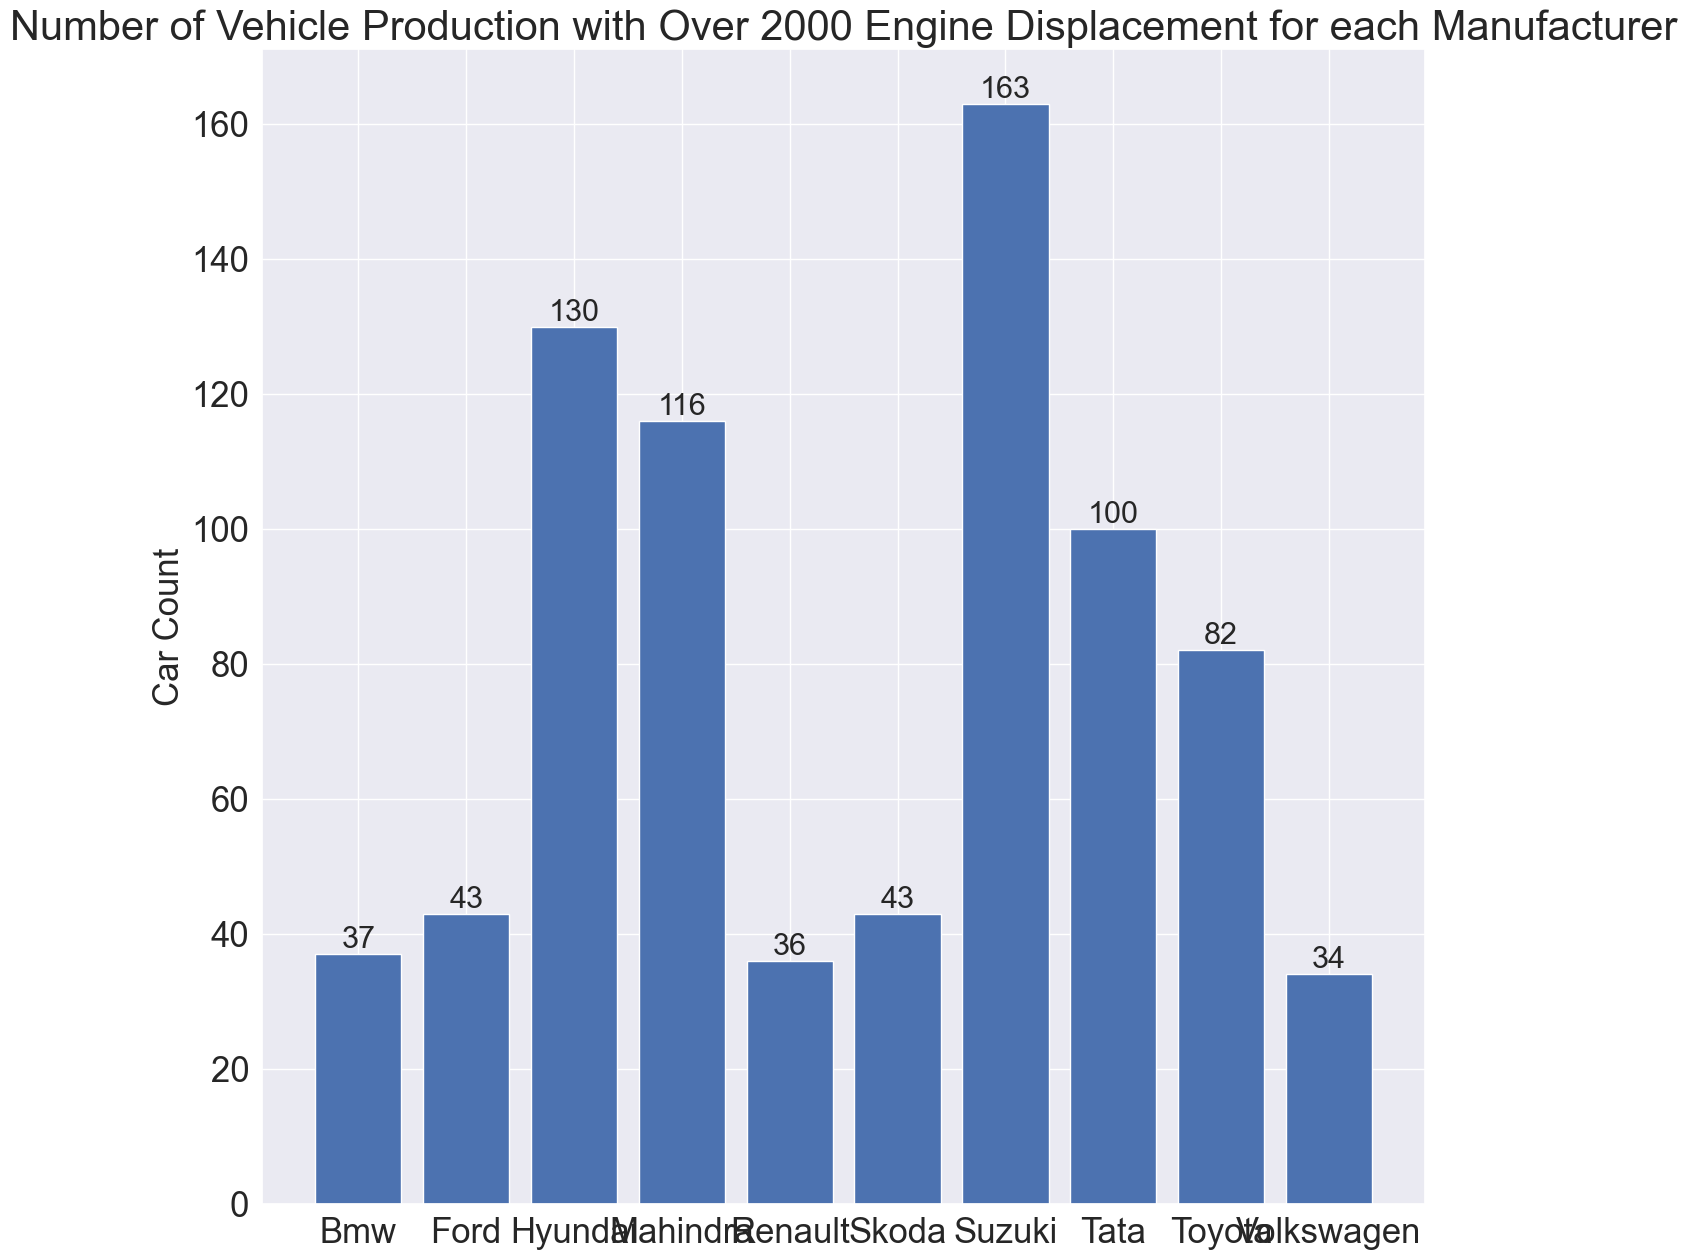

In [67]:
group_agg_bar_plot(df, 
                   'make', 
                   'serial_no',
                   'count',
                   ylabel = 'Car Count',
                   title = "Number of Vehicle Production with Over 2000 Engine Displacement for each Manufacturer",
                   yticksfontsize=25)

* The graph shows that BMW, Ford, Mahindra, Tata, Toyota would offer the vehicle that has over 2000 engine displacement.
* BMW and Toyota are the top 2 for the number of production where Toyota produce 26 cars and BMW product 20 cars
* The gap between 2nd and 3rd place car are very speaking of number of production.

# 2. What type of vehicle fuel type of Toyota that has the engine over 2000?
* What is the most common vehicle fuel type produced by Toyota?

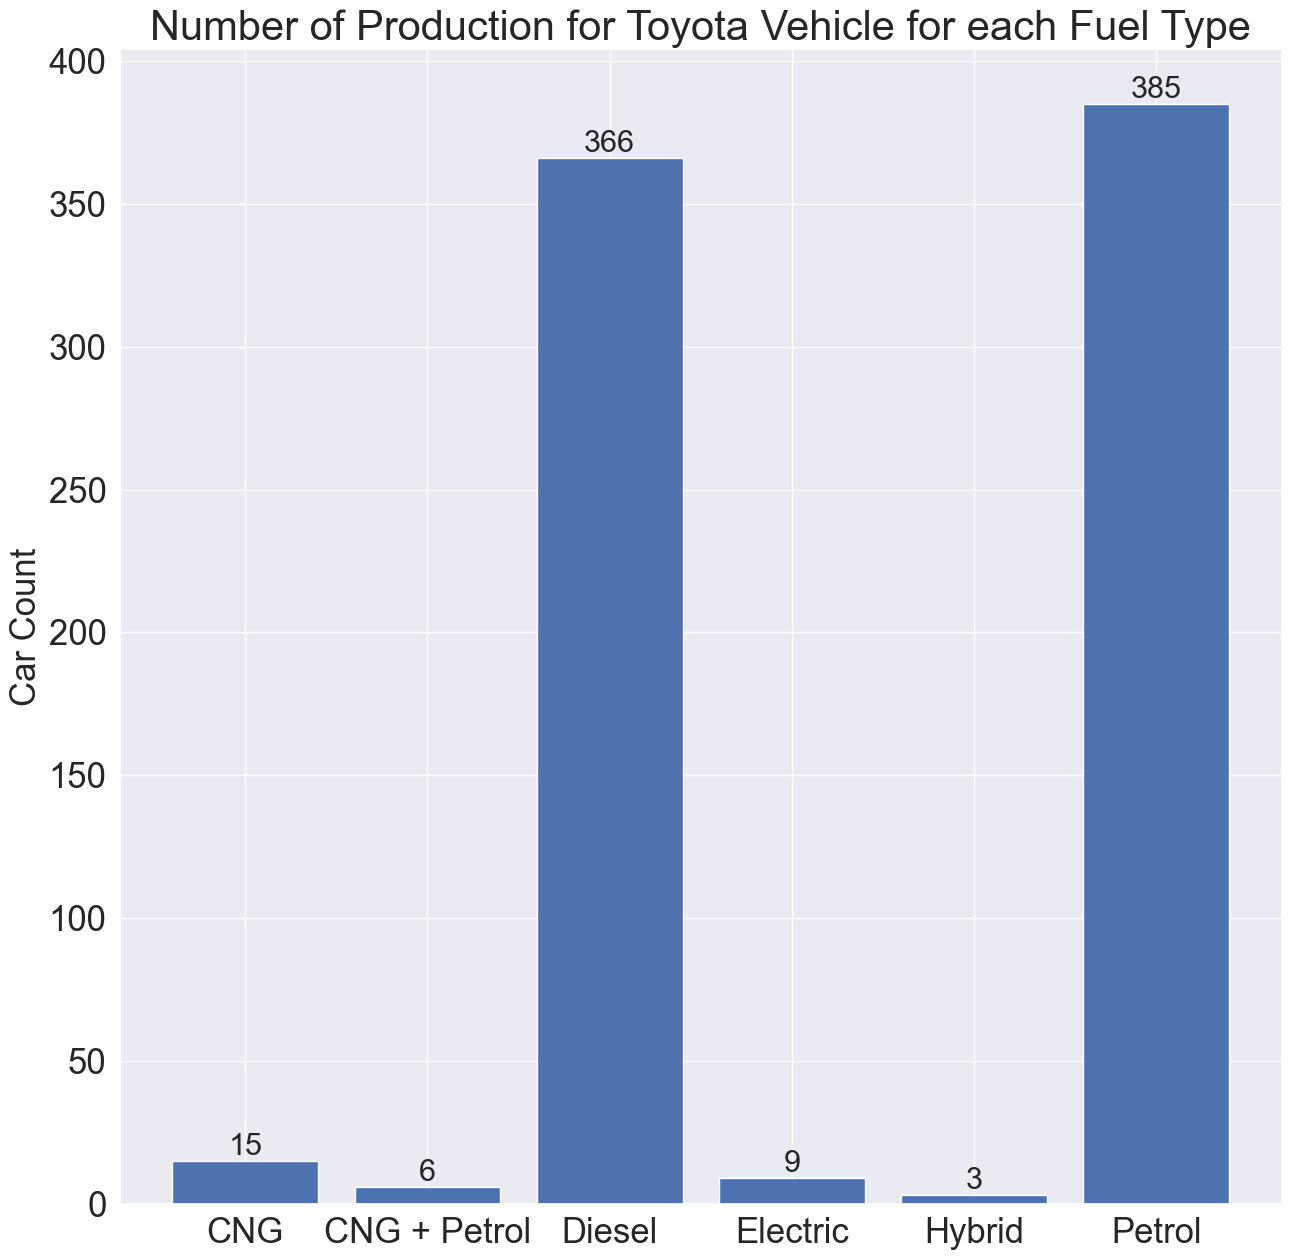

In [68]:
group_agg_bar_plot(df, 
                   'fuel_type', 
                   'serial_no',
                   'count',
                   ylabel = 'Car Count',
                   title = "Number of Production for Toyota Vehicle for each Fuel Type",
                   yticksfontsize=25)

* The above graphs shows that the number of production for Toyota vehicle with engine over 2000 displacement
* According to the shown graph, the diesel and petrol covers the majority of the population.
* Diesel and Petrol are the most common for vehicle with engine over 2000

# 3. Is the number of productions for Diesel for vehicle with 2000 engine displacement is still high overall?

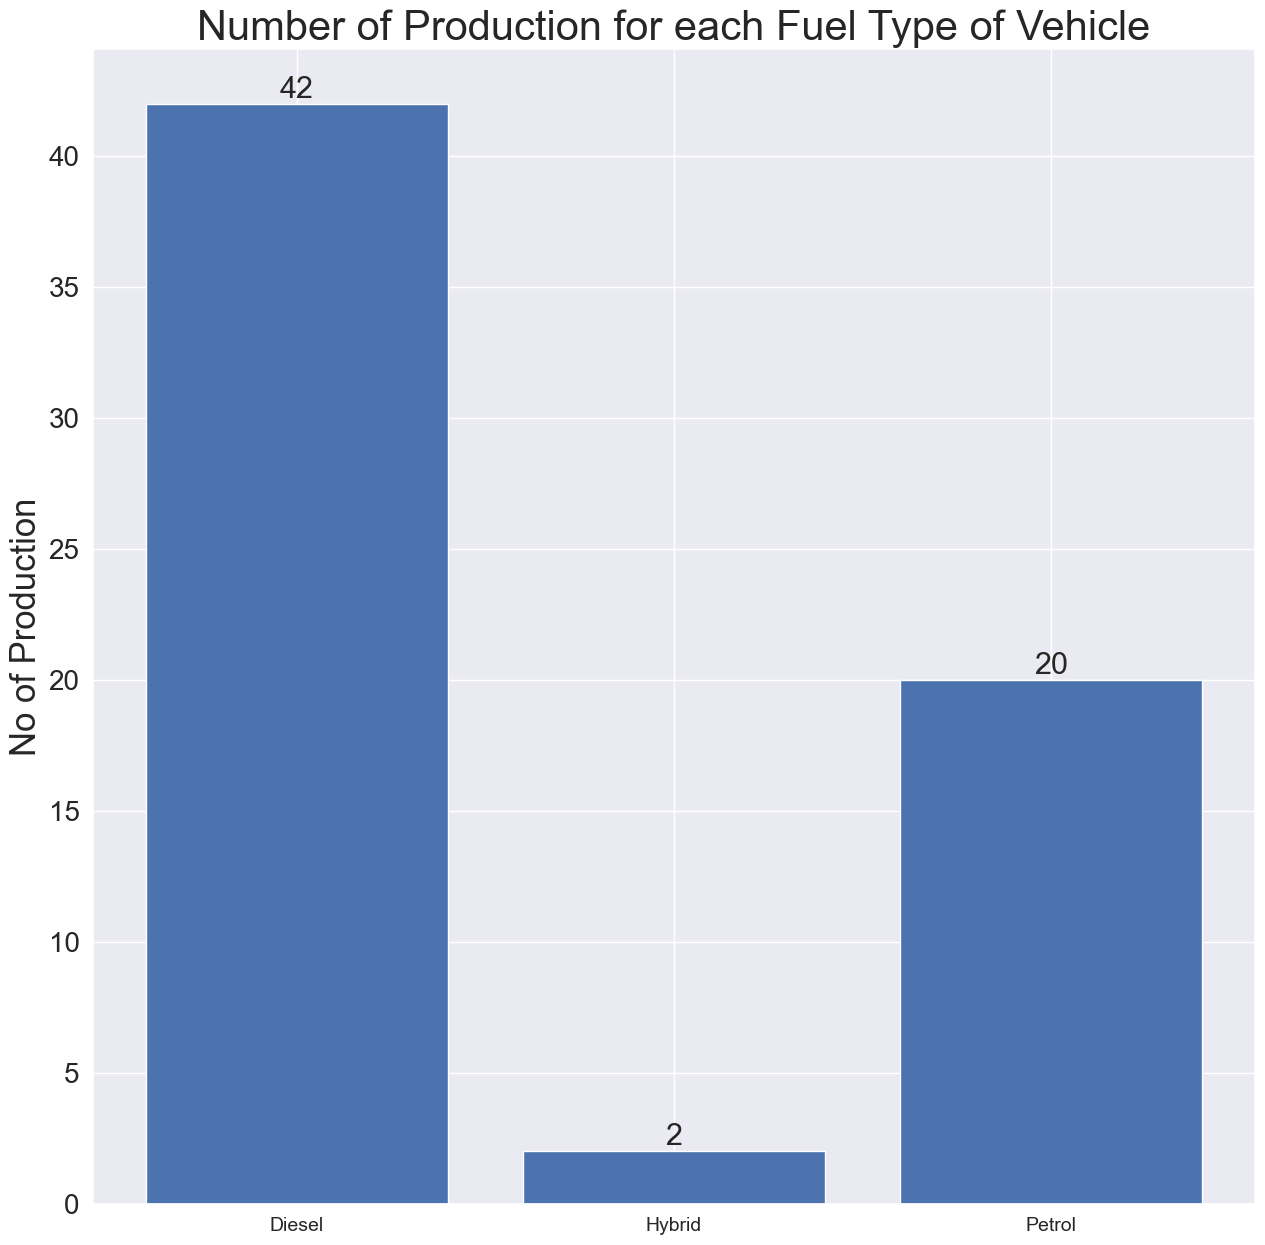

In [69]:
group_agg_bar_plot(p75_displacement, 
                   'fuel_type', 
                   'serial_no',
                   'count',
                   ylabel = 'No of Production',
                   title = "Number of Production for each Fuel Type of Vehicle",
                   xticksfontsize= 14,
                   yticksfontsize=20)

* The graph shows the number of production of vehicle that are produced by all manufacturer.
* By looking at this graph, the number of productions for Diesel and Petrol are still ranked the 1st and 2nd place respectively.

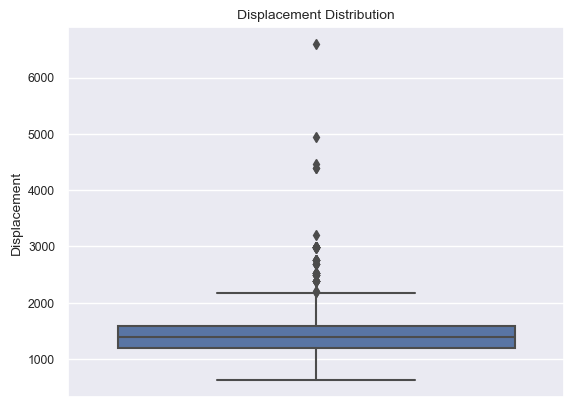

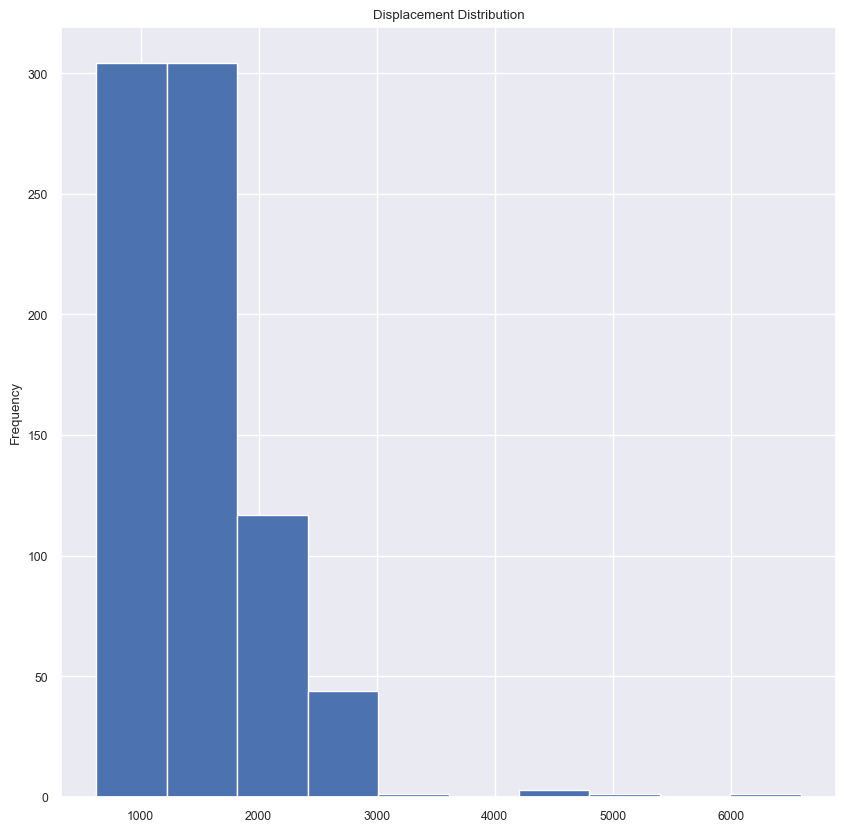

Whisker:

Lower whisker 606.0
Upper Whisker 2182.0

Length of outlier index len():  73
dataset.shape[0]:  784
dataset_no_outliers.shape[0]:  711
No of outlier (dataset.shape[0]-dataset_no_outliers.shape[0]) :  73

Stats Info:
-------------------------------------------
Mean of displacement:  1521.4541935483871
Median of displacement:  1397.0
Mode of displacement:  0    1197.0
Name: displacement, dtype: float64
Min of displacement:  624.0
Max of displacement:  6592.0
Standard Deviation of displacement:  556.2120156573304
25th percentile of displacement:  1197.0
75th percentile of displacement:  1591.0

Outlier Info:
-------------------------------------------
Number of outliers:  73

Null values:  9


In [70]:
p25, p75, iqr,  outlier_index, outliers_num =univariate_analysis(df, 'displacement')

# 4. Do Diesel, Hybrid, and Petrol offer higher Engine Displacement if the engine displace is over 2000?

In [71]:
def univariate_categorical_analysis_using_boxplot(data, categorical, numerical, xlabel = "", ylabel = "", title = "",
                                                  figsize = (10,10),  
                                                  font_scale = 1):
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale)
    boxplot = sns.boxplot(x = data[categorical], y = data[numerical])
    boxplot.set_xlabel(xlabel)
    boxplot.set_ylabel(ylabel)
    boxplot.set_title(title)
    plt.show()

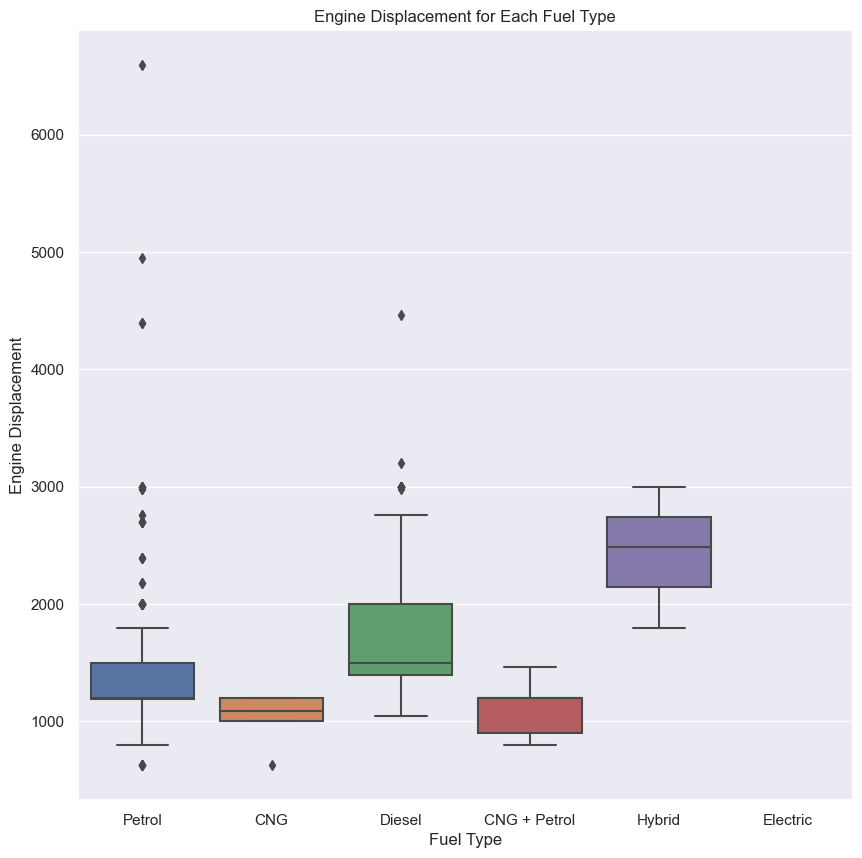

In [72]:
univariate_categorical_analysis_using_boxplot(df, 'fuel_type', 'displacement', 
                                              xlabel = "Fuel Type", 
                                              ylabel = "Engine Displacement", 
                                              title = "Engine Displacement for Each Fuel Type")

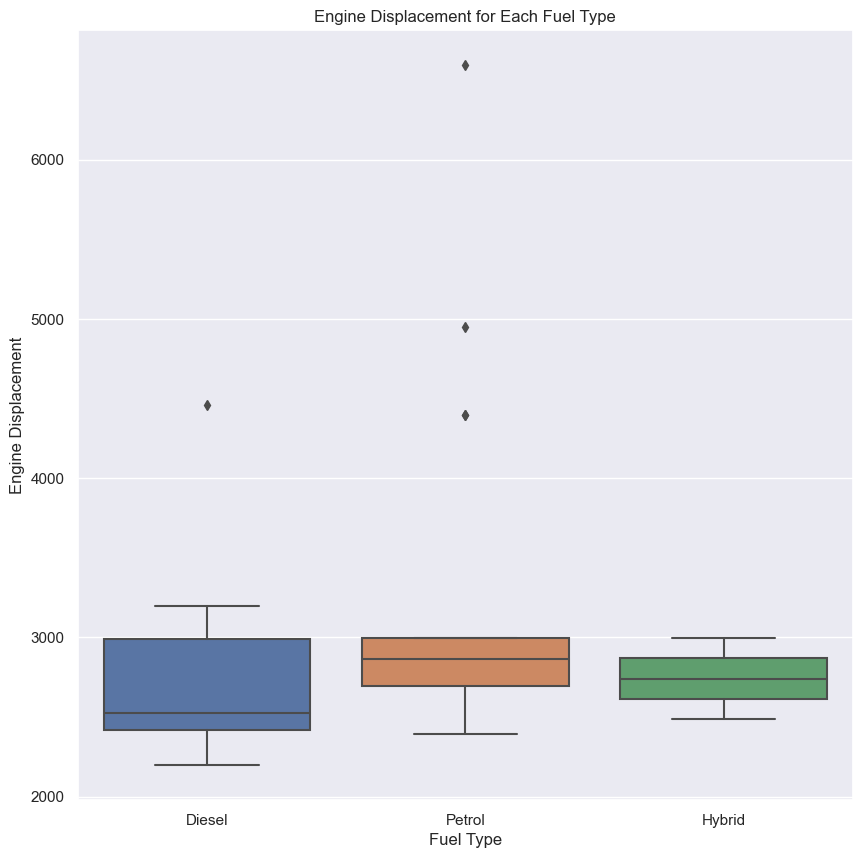

In [73]:
univariate_categorical_analysis_using_boxplot(p75_displacement, 'fuel_type', 'displacement', 
                                              xlabel = "Fuel Type", 
                                              ylabel = "Engine Displacement", 
                                              title = "Engine Displacement for Each Fuel Type")

* The graphs above the boxplot of engine displacement for each fuel type of vehicles
* Based on the insights, it is showing that hybrid, diesel, and petrol are still the highest
* Hybrid: 2100 - 2600 displacment
* Diesel: 1400 - 2000 displacement
* Petrol: 1200 - 1500 displacement

# 5. What kind body type would diesel fueled type vehicle have?

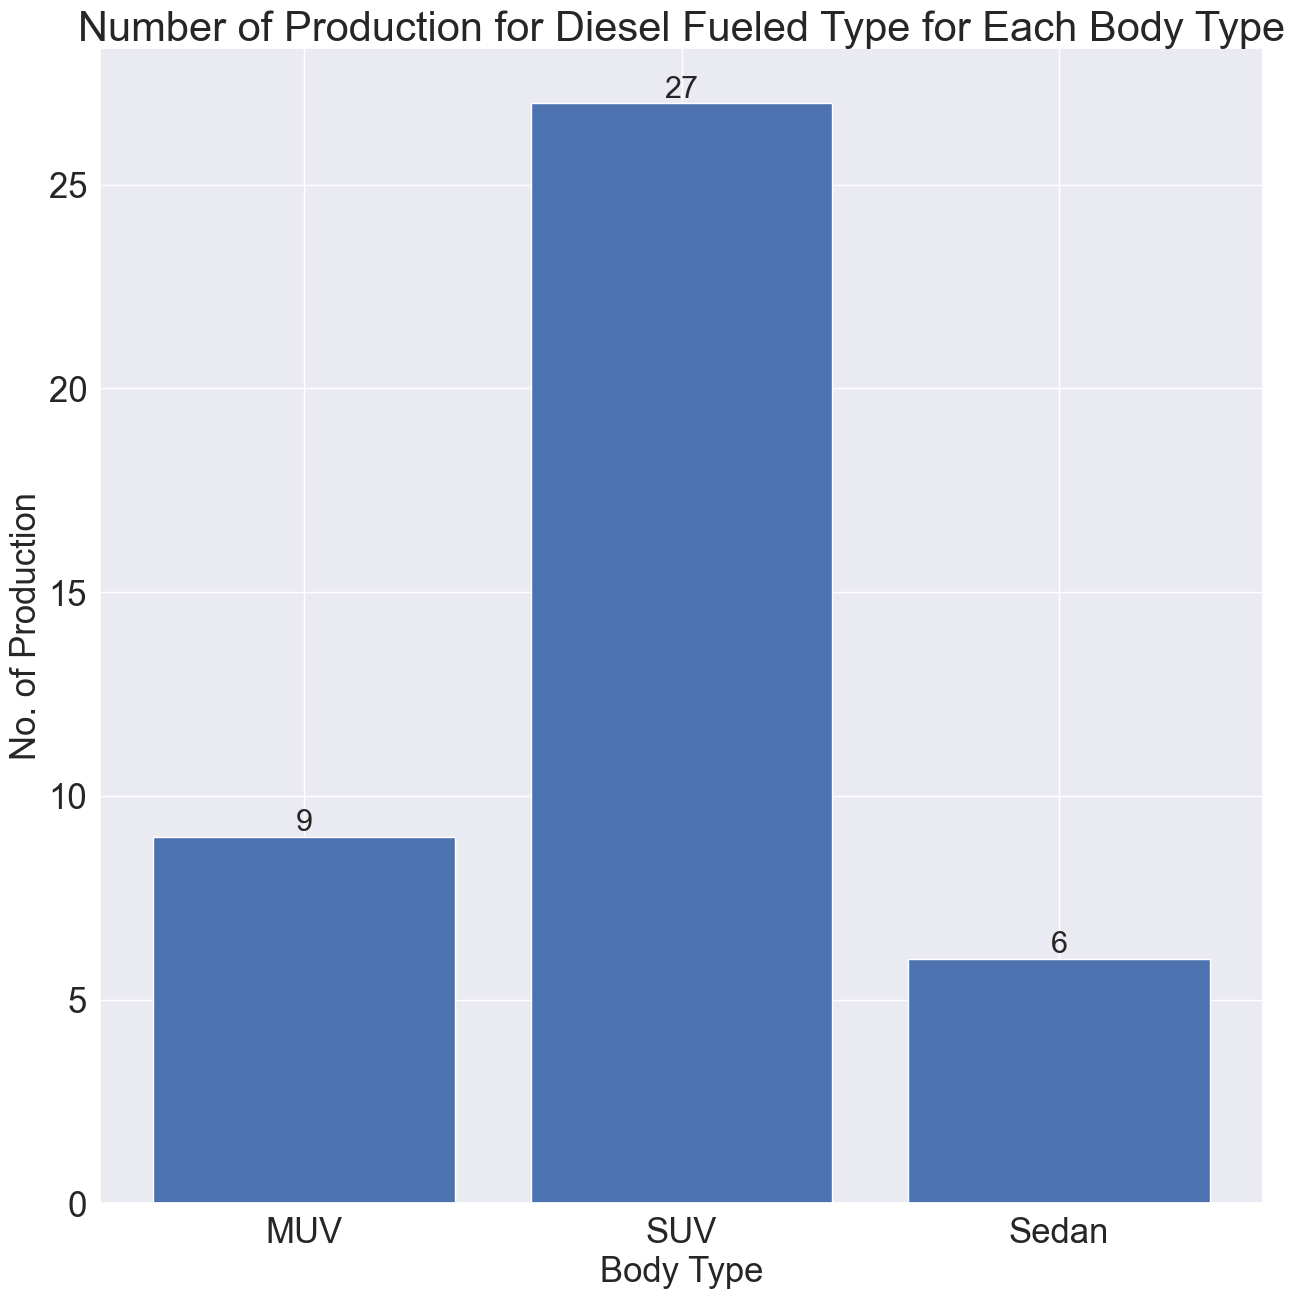

In [74]:
diesel_p75_displacement = p75_displacement[(p75_displacement['fuel_type'] == 'Diesel') ]
group_agg_bar_plot(diesel_p75_displacement,
                  category= 'body_type',
                   number= 'serial_no', 
                   agg= 'count', xlabel = 'Body Type',ylabel='No. of Production', 
                   title='Number of Production for Diesel Fueled Type for Each Body Type')

* There are 3 types of body types that diesel vehicle with displacement over 2000 would produce which are the following
* MUV
* SUV
* Sedan

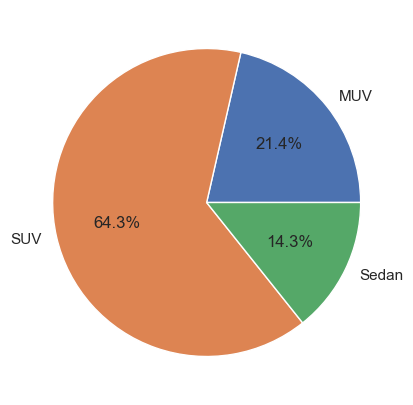

In [75]:
group_agg_pie(diesel_p75_displacement, 'body_type', 'serial_no')

* According to the pie chart above, SUV dominates by 60% in terms of number of production which means that SUV is the most common type body type of vehicle that is found on diesel with engine over 2000

# 6. Does SUV, MUV, Sedan have stronger engine displacement for diesel fueled type?

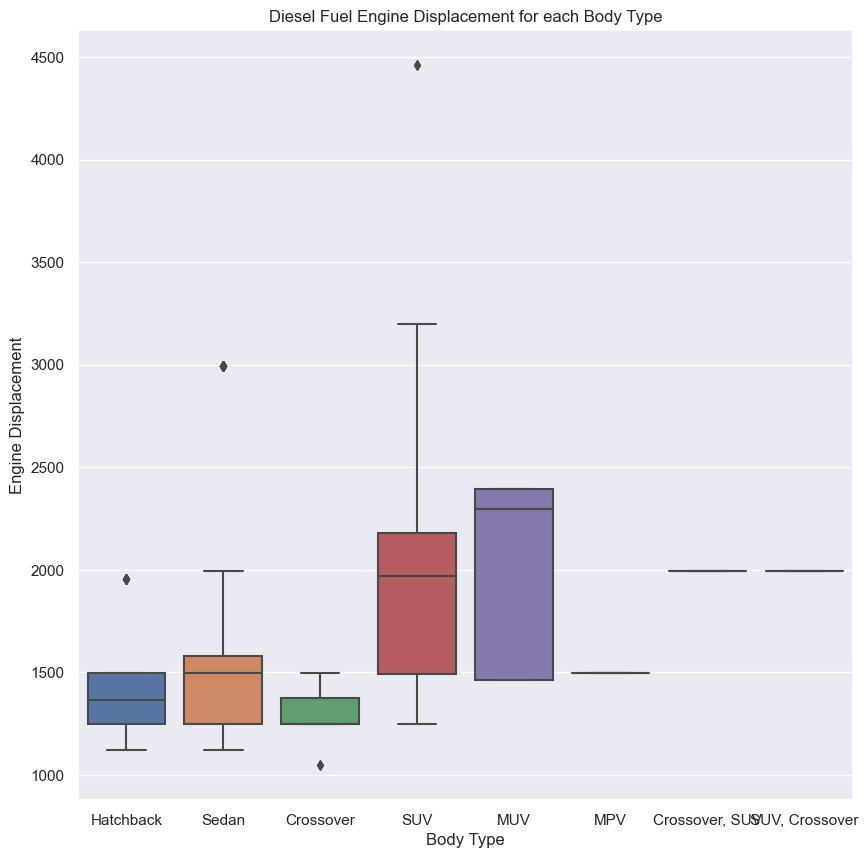

In [76]:
univariate_categorical_analysis_using_boxplot(df[df['fuel_type'] == 'Diesel'], 
                                              'body_type', 
                                              'displacement', 
                                              xlabel = "Body Type", 
                                              ylabel = "Engine Displacement", 
                                              title = "Diesel Fuel Engine Displacement for each Body Type")

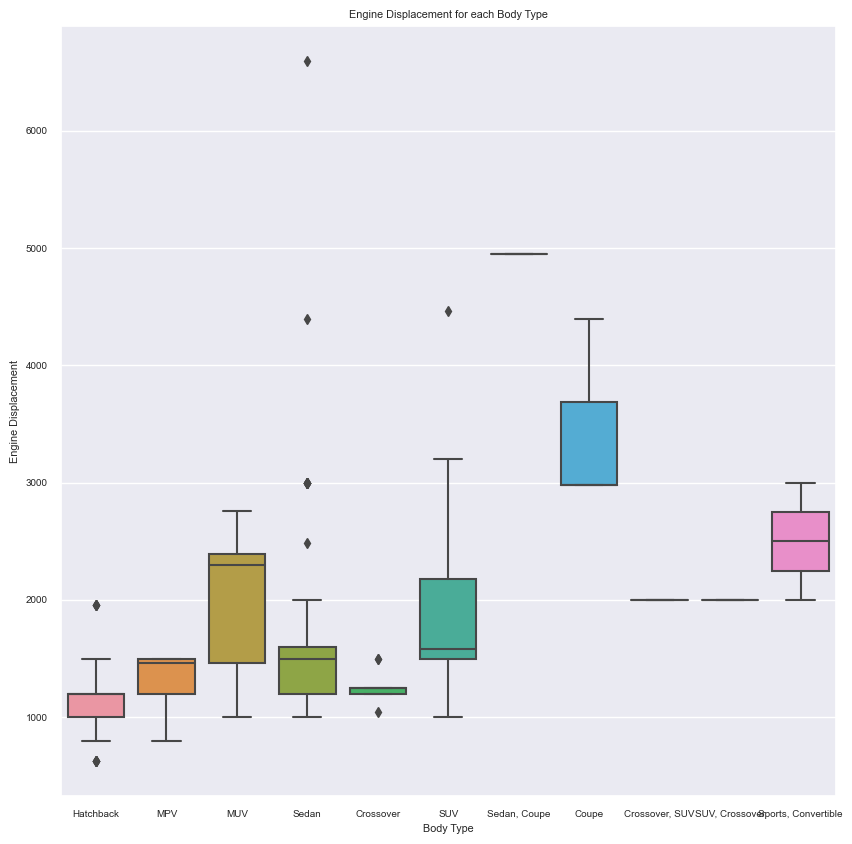

In [77]:
univariate_categorical_analysis_using_boxplot(df, 
                                              'body_type', 
                                              'displacement', 
                                              xlabel = "Body Type", 
                                              ylabel = "Engine Displacement", 
                                              title = "Engine Displacement for each Body Type", font_scale = 0.65)

* Based on the insights, MUV, SUV, and Sedan has the most powerful body type the diesel vehicle whereas for the all types of vehicle, the sedan (coupe), coupe, and MUV are the most powerful

# 7. What transmission are available for vehicle with engine displacement over 2000?

In [78]:
pd.DataFrame(p75_displacement['type'].value_counts()).reset_index().rename(columns = {
    "index": "Transmission",
    "type": "No of Production"
})

Transmission  No of Production
0    Automatic                34
1       Manual                30

The available transmission for the vehilces with the engine over 2000 are automatic and manual.

Where as in all vehicles, not only automatic and manual are available but there are AMT (automatic manual transmission)a, CVT(continuously variable transmission), and DCT (dual clutch transmission).

In [79]:
pd.DataFrame(df['type'].value_counts()).reset_index().rename(columns = {
    "index": "Transmission",
    "type": "No of Production"
})

Transmission  No of Production
0       Manual               545
1    Automatic               216
2          AMT                18
3          CVT                 3
4          DCT                 2

# 8. Does automatic transmission car tend to produce higher engine displacement?

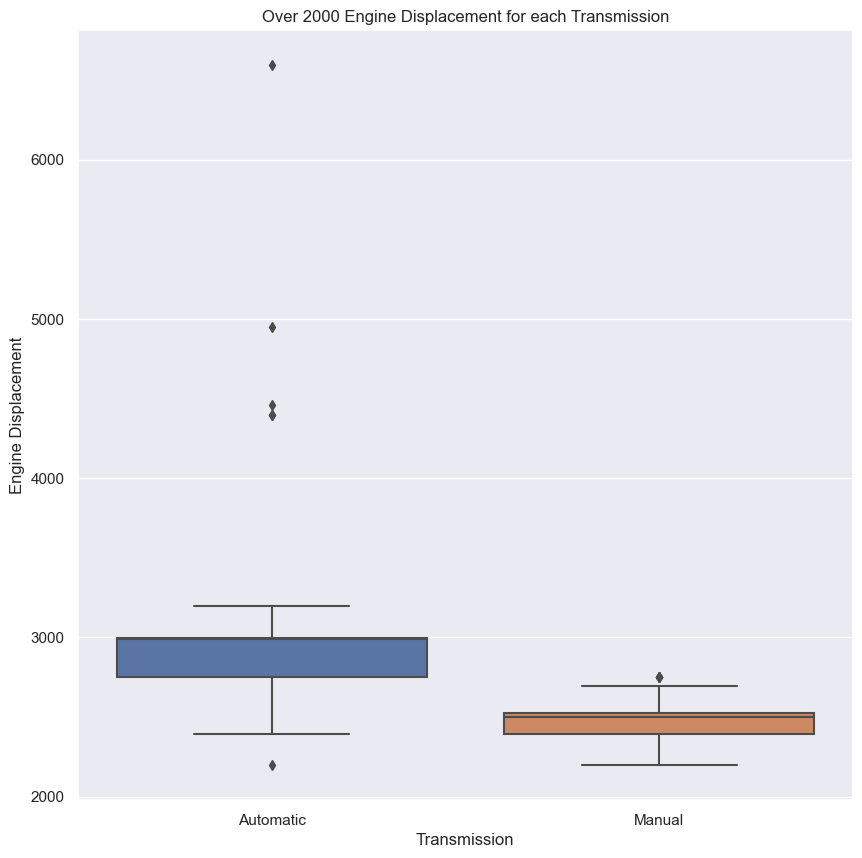

In [80]:
univariate_categorical_analysis_using_boxplot(p75_displacement, 
                                              'type', 
                                              'displacement', 
                                              xlabel = "Transmission", 
                                              ylabel = "Engine Displacement", 
                                              title = "Over 2000 Engine Displacement for each Transmission")

* For the vehicle with over 2000 , automatic transmission would have higher engine displacement than manual transmission would have
* The torque is spread out over a greater area, which increase the vehicle power

# 9. Do Automatic and Manual transmission produce more engine displacement than any other transmission vehicle that have engine displacement less than 2000? 

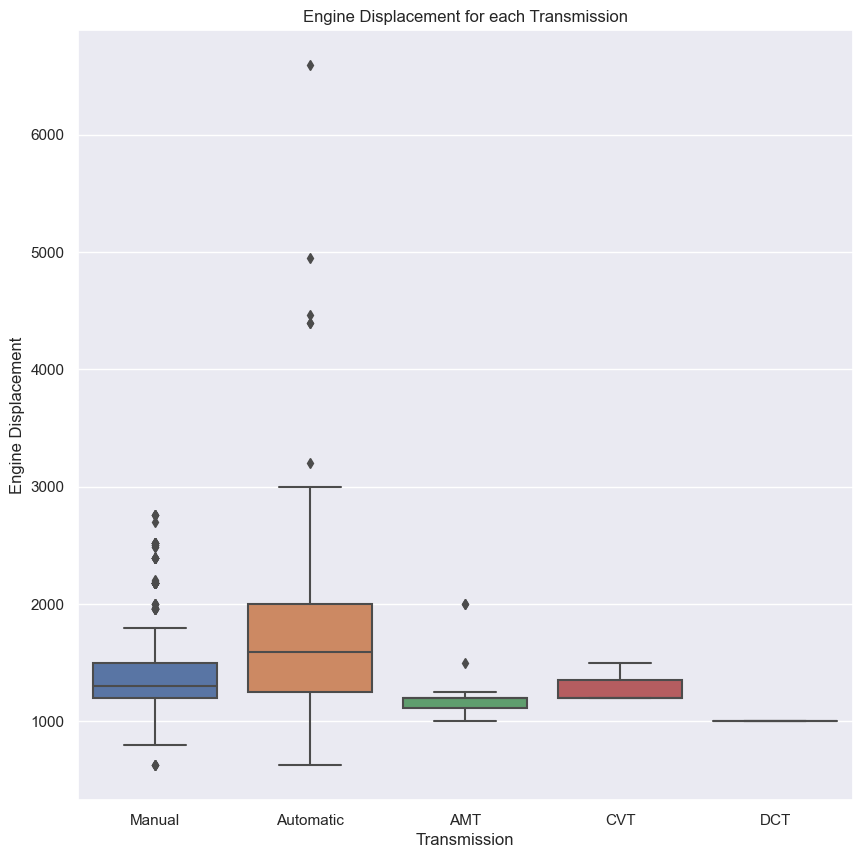

In [81]:
univariate_categorical_analysis_using_boxplot(df, 
                                              'type', 
                                              'displacement', 
                                              xlabel = "Transmission", 
                                              ylabel = "Engine Displacement", 
                                              title = "Engine Displacement for each Transmission")

* For all with any engine displacement, automatic and manual transmission have higher engine displacement than any vehicles with other type of transmission

C:\Users\darry\AppData\Local\Temp\ipykernel_15040\357108116.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, annot_kws={"fontsize":fontsize})


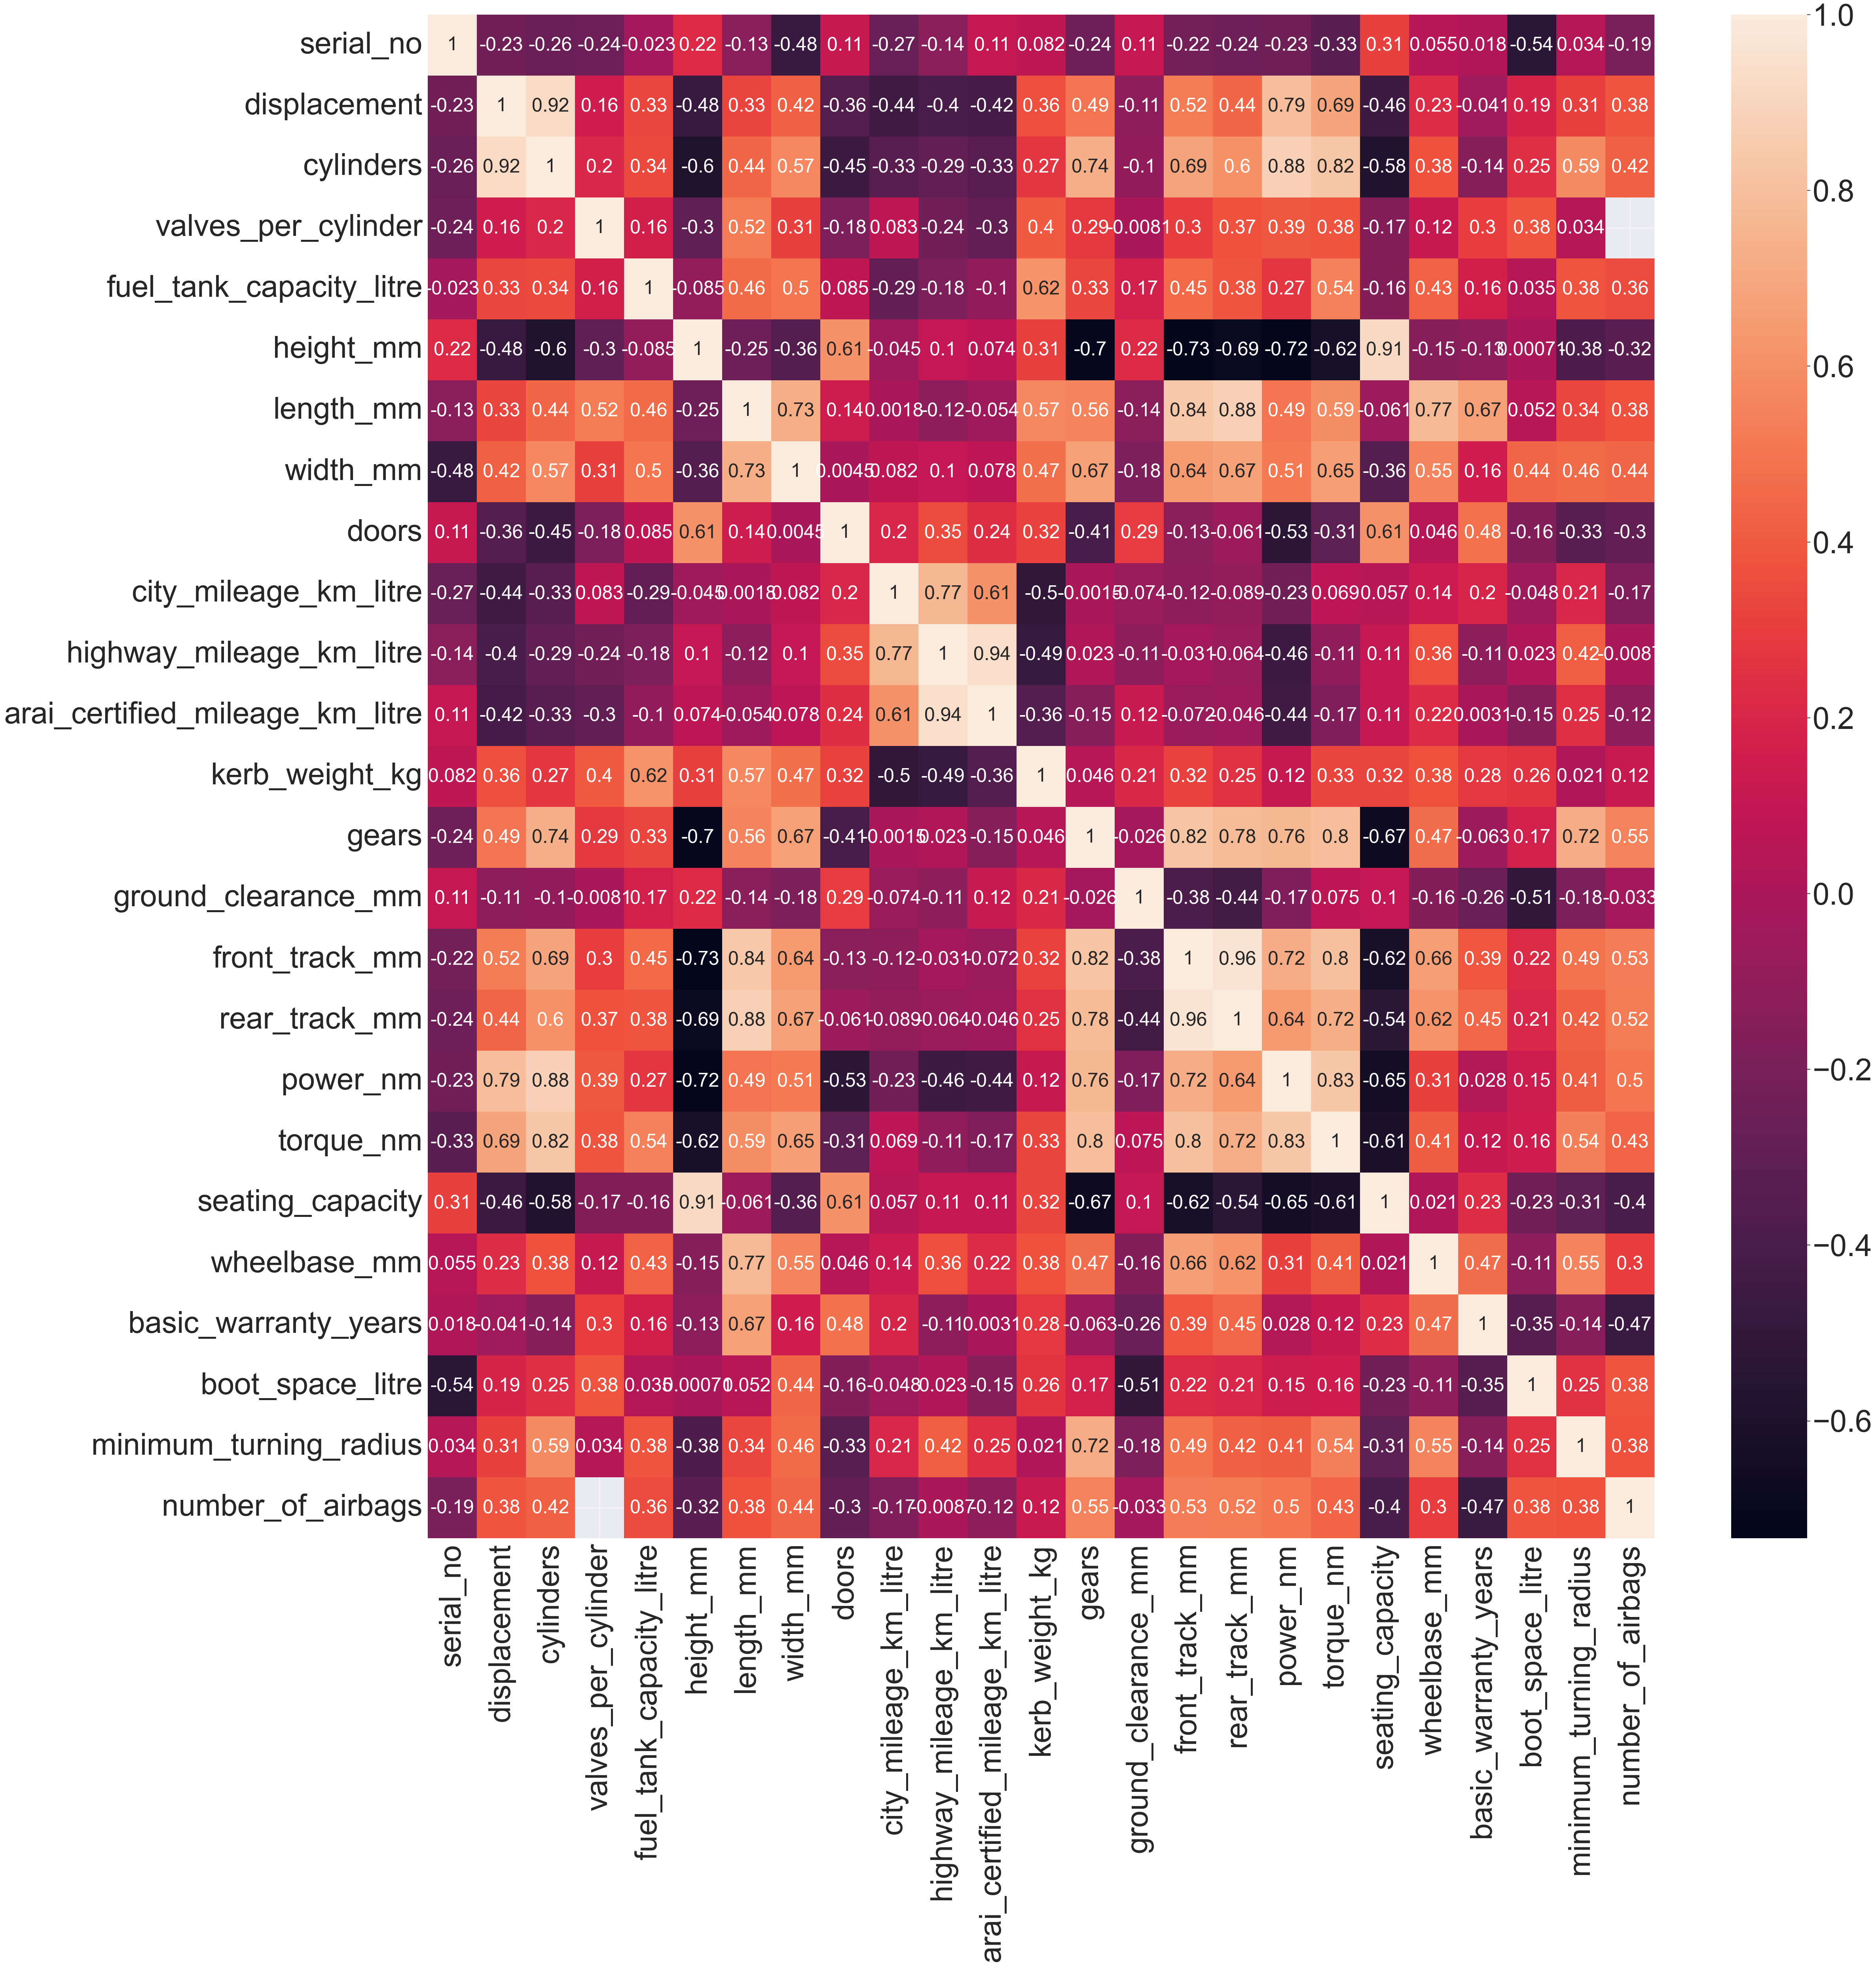

In [82]:
correlation_heatmap(p75_displacement, figsize = (50,50) ,font_scale=5, fontsize = 35)

C:\Users\darry\AppData\Local\Temp\ipykernel_15040\357108116.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, annot_kws={"fontsize":fontsize})


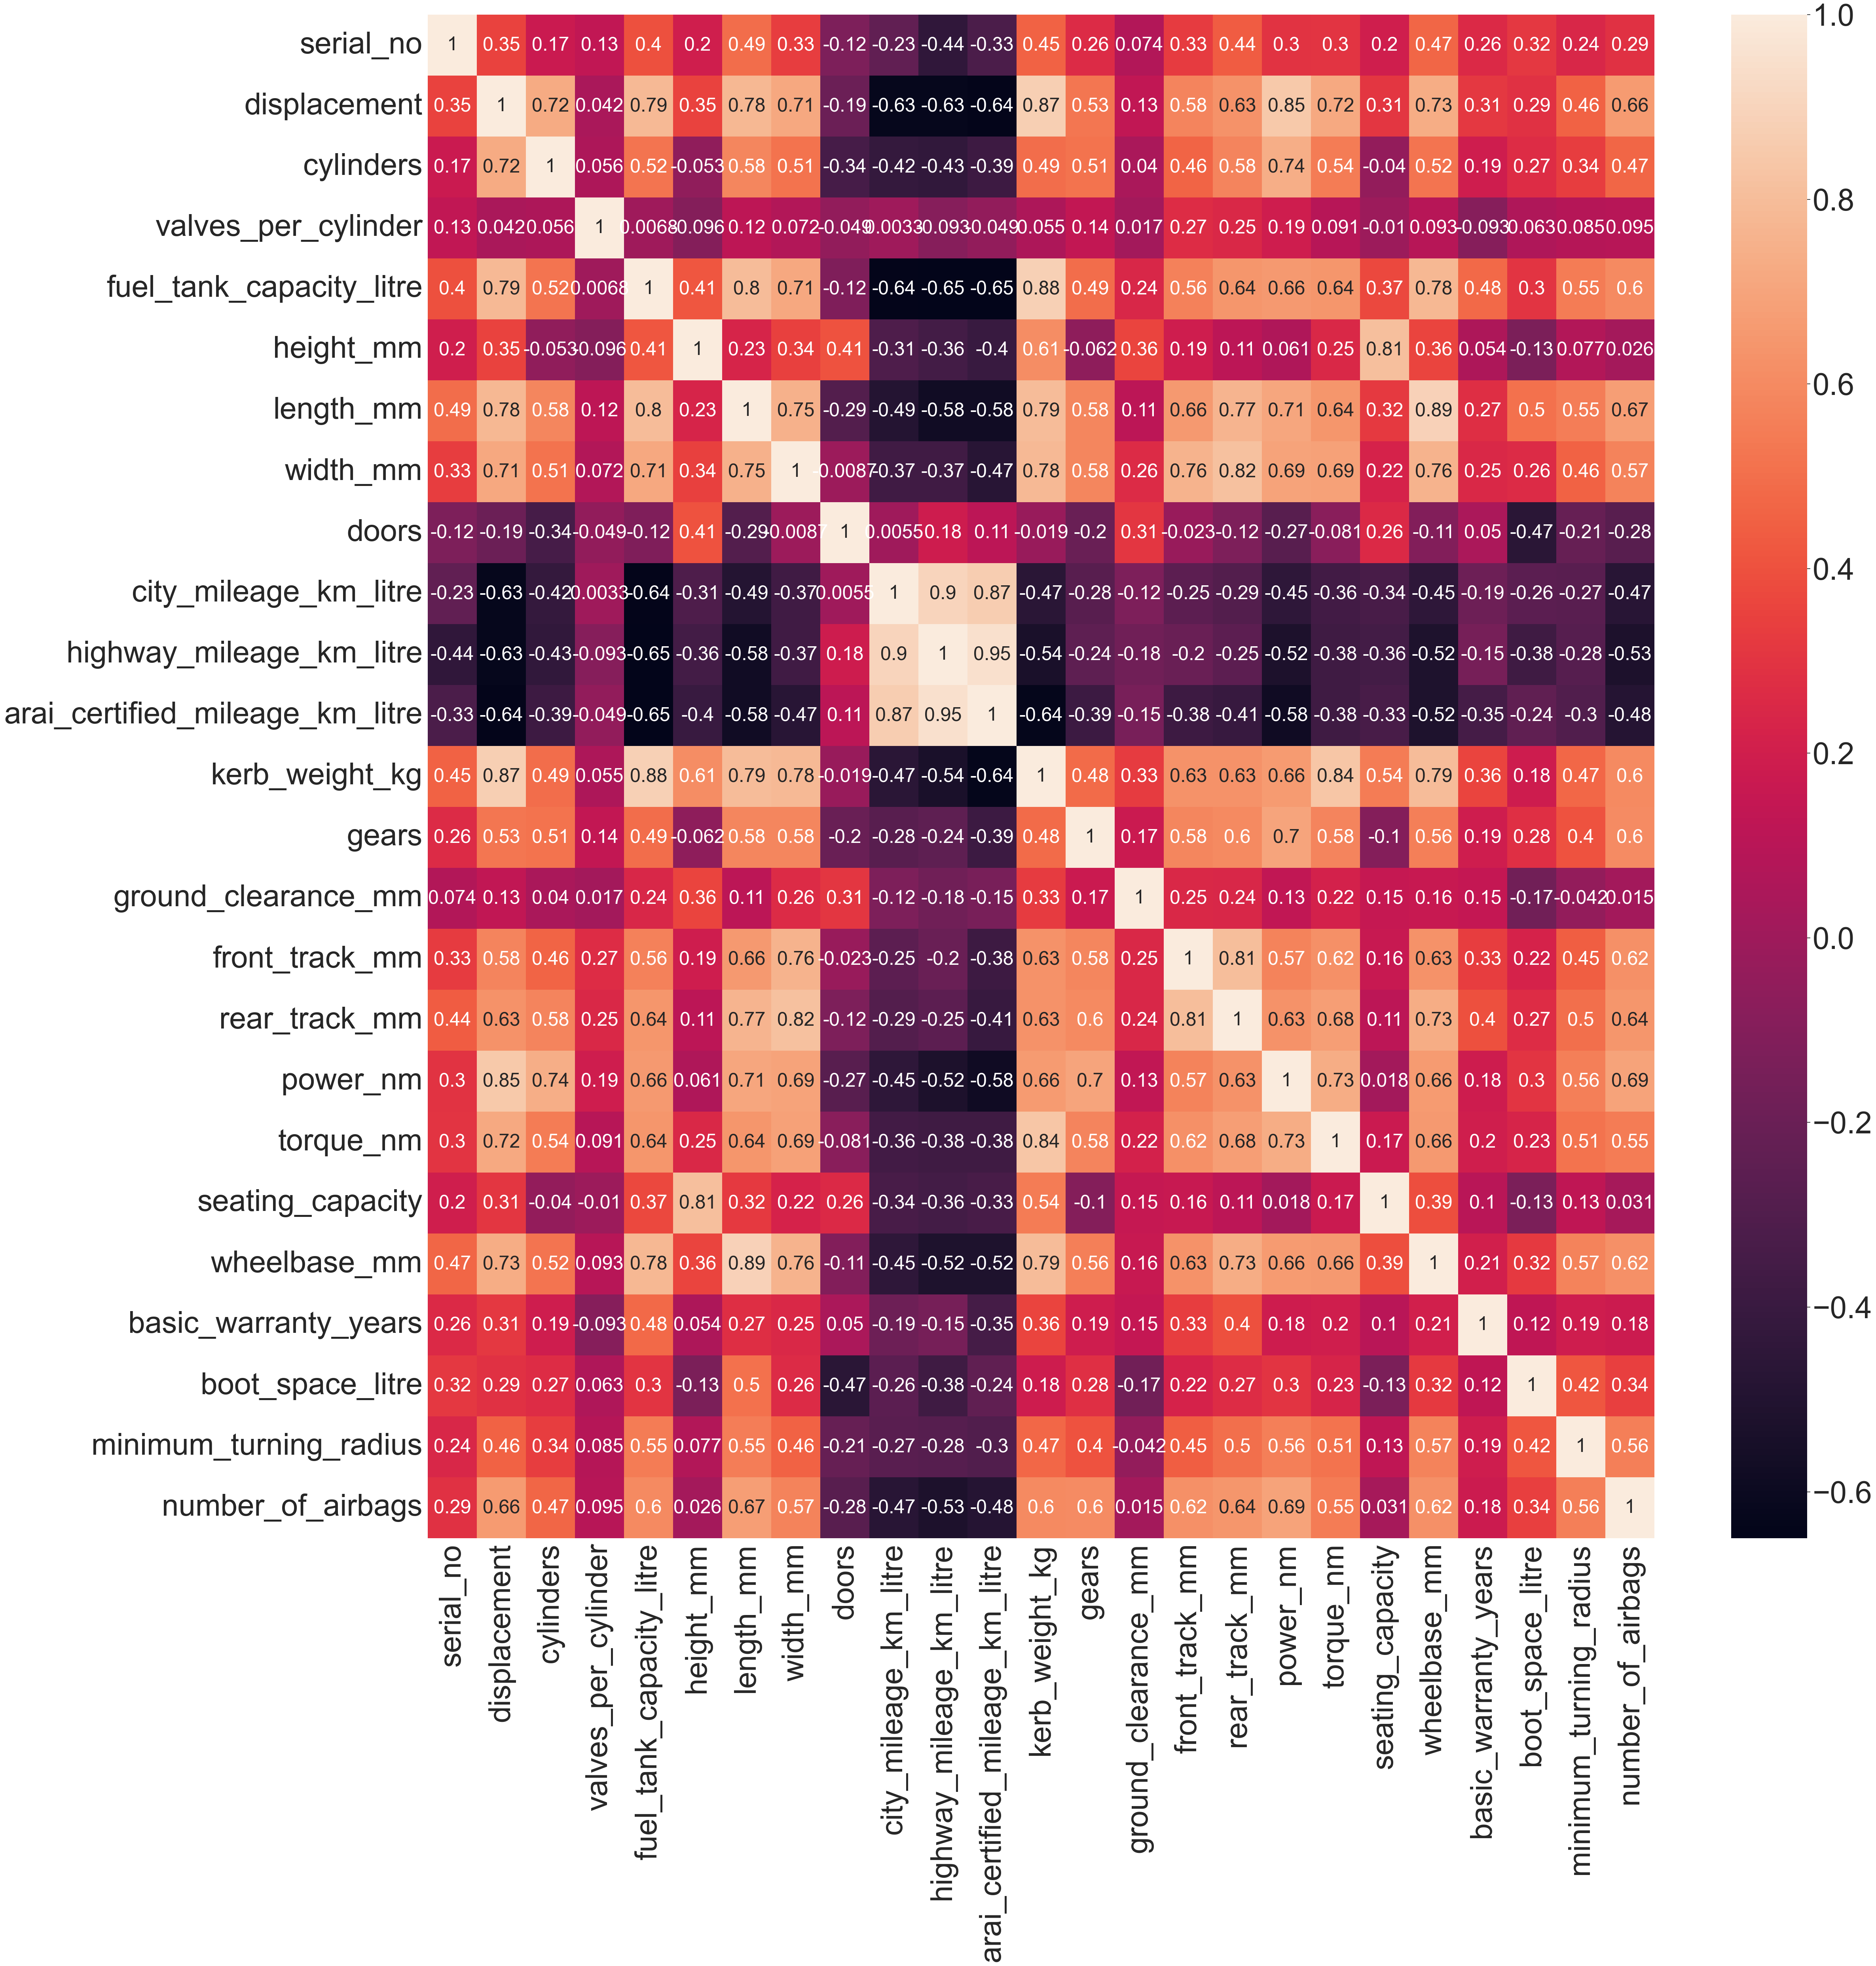

In [83]:
correlation_heatmap(df, figsize = (50,50) ,font_scale=5, fontsize = 35)

# 10. Do vehicle with higher engine displacement create more power?

Covariance:  68113.94647817462
Standard Deviation of x:  708.7355424955267
Standard Deviation of y:  121.28155320909083
Correlations:  0.7924230152543538
----------------------------------------



<Figure size 2500x2500 with 0 Axes>

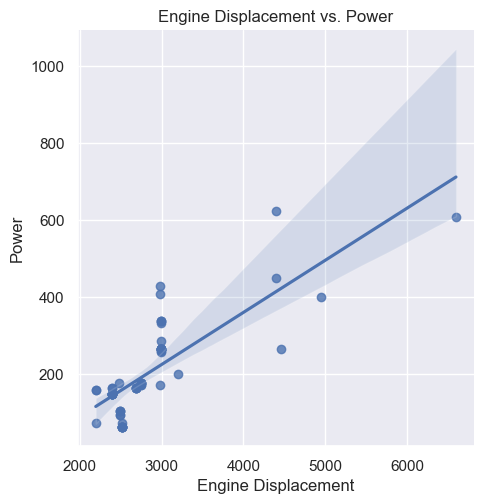

In [84]:
bivariate_analysis(p75_displacement, 'displacement', 'power_nm', xlabel = "Engine Displacement", ylabel = "Power")

* The graph shows a positive correlation between power and engine displacement
* The bigger engine displacement, it will produce more power as the engine is capable of bring more air in and burn more fuel.

# 11 Does number of cylinders give more power?

Covariance:  160.76820436507938
Standard Deviation of x:  1.5045400868756782
Standard Deviation of y:  121.28155320909083
Correlations:  0.8810522150631129
----------------------------------------



<Figure size 2500x2500 with 0 Axes>

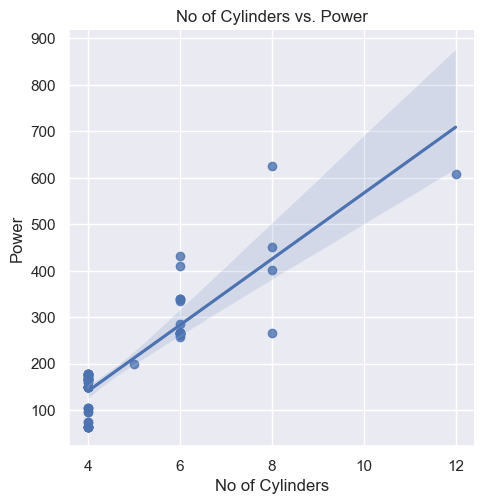

In [85]:
bivariate_analysis(p75_displacement, 'cylinders', 'power_nm', xlabel = "No of Cylinders", ylabel = "Power")

# 12. Does torque give more power?

Covariance:  16107.968535166581
Standard Deviation of x:  164.24507120818544
Standard Deviation of y:  117.80245674620525
Correlations:  0.8325188567128504
----------------------------------------



<Figure size 2500x2500 with 0 Axes>

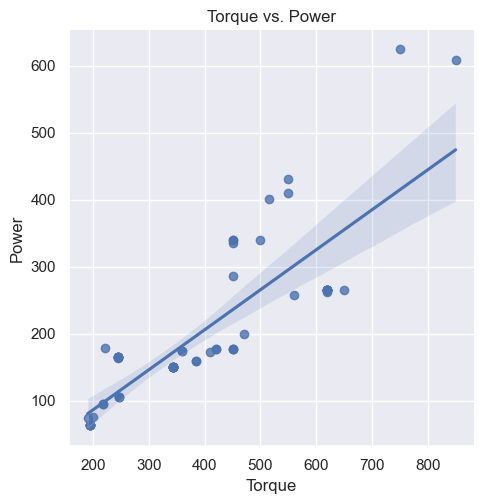

In [86]:
bivariate_analysis(p75_displacement, 'torque_nm', 'power_nm', xlabel = "Torque", ylabel = "Power")

# 13. Does vehicle with larger engine displacement have a better fuel efficiency?

Covariance:  -129.41872068965515
Standard Deviation of x:  116.51314705552164
Standard Deviation of y:  2.4308808535462885
Correlations:  -0.4569392838041463
----------------------------------------



<Figure size 2500x2500 with 0 Axes>

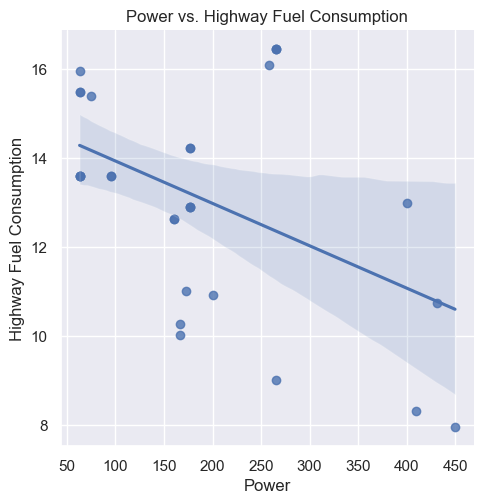

In [87]:
bivariate_analysis(p75_displacement, 'power_nm', 'highway_mileage_km_litre', xlabel = "Power", ylabel = "Highway Fuel Consumption")

* The graph shows a negative correlation between engine displacement and fuel consumption.
* While the higher engine displacement create more power, lower engine displacement consume less fuel.
* The engine will require consume more fuel for the engine to create more power and maintain at high speed.

In [88]:
#p75_displacement.to_excel(r'automotive_displacement_outliers.xlsx', index = False)